# Module Imports

In [316]:
import numpy as np
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
import datetime

In [317]:
df = pd.read_csv('BTC-USD.csv')

# Data Exploration 

In [318]:
df.head

<bound method NDFrame.head of             Date          Open          High           Low         Close  \
0     17/09/2014    465.864014    468.174011    452.421997    457.334015   
1     18/09/2014    456.859985    456.859985    413.104004    424.440002   
2     19/09/2014    424.102997    427.834991    384.532013    394.795990   
3     20/09/2014    394.673004    423.295990    389.882996    408.903992   
4     21/09/2014    408.084991    412.425995    393.181000    398.821014   
...          ...           ...           ...           ...           ...   
2515  06/08/2021  40865.867190  43271.660160  39932.179690  42816.500000   
2516  07/08/2021  42832.796880  44689.859380  42618.566410  44555.800780   
2517  08/08/2021  44574.437500  45282.351560  43331.910160  43798.117190   
2518  09/08/2021  43791.925780  46456.832030  42848.687500  46365.402340   
2519  10/08/2021  46274.191410  46503.171880  45359.714840  45421.683590   

         Adj Close        Volume  
0       457.334015  2.

In [319]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,8367.993124,8609.046940,8104.681274,8384.849217,8384.849217,1.314307e+10
std,12379.802902,12769.294273,11929.803665,12399.075891,12399.075891,1.979067e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,569.089508,575.391754,561.964737,569.758758,569.758758,7.095970e+07
50%,4947.056884,5115.198242,4829.396973,4971.905029,4971.905029,4.249775e+09
75%,9386.981445,9557.482911,9238.094238,9393.408692,9393.408692,2.026569e+10
max,63523.753910,64863.097660,62208.964840,63503.457030,63503.457030,3.509680e+11


In [320]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [321]:
df.shape

(2520, 7)

In [322]:
df.columns = df.columns.str.replace(' ','_')

In [323]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume'], dtype='object')

In [324]:
df.mean()

Open         8.367993e+03
High         8.609047e+03
Low          8.104681e+03
Close        8.384849e+03
Adj_Close    8.384849e+03
Volume       1.314307e+10
dtype: float64

<BarContainer object of 2520 artists>

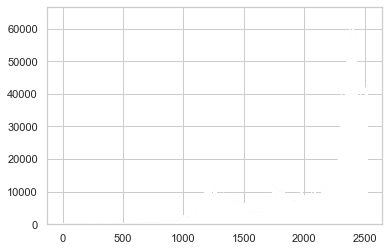

In [325]:
import matplotlib.pyplot as plt
plt.bar(np.arange(len(df.Adj_Close)), df.Adj_Close)

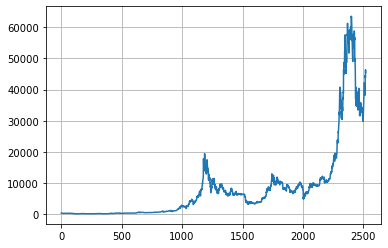

In [11]:
df['Adj_Close'].plot(grid=True)
plt.show()

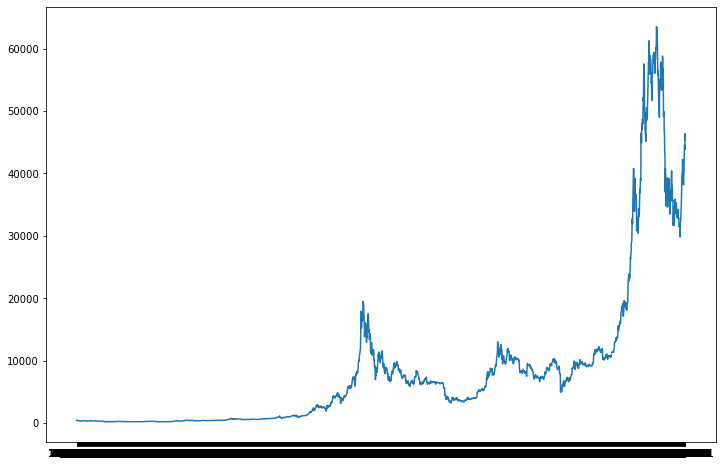

In [12]:
plt.figure(figsize=(12,8))
plt.plot(list(df.Date), list(df['Adj_Close'].values))
plt.show()

# Data preprocessing

In [326]:
df['Date'] = pd.to_datetime(df.Date , format = '%d/%m/%Y')
data = df.drop(['Date'], axis=1)
data.index = df['Date']

In [327]:
data.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2021-08-01', '2021-08-02', '2021-08-03', '2021-08-04',
               '2021-08-05', '2021-08-06', '2021-08-07', '2021-08-08',
               '2021-08-09', '2021-08-10'],
              dtype='datetime64[ns]', name='Date', length=2520, freq=None)

In [328]:
columns = data.columns
for col in columns:
    data[col].interpolate(method='time', inplace=True)

In [329]:
X_train = data[:int(0.8*(len(data)))]
X_test = data[int(0.8*(len(data))):]

# *Model* *Training*

**Vector Auto Regressor**

In [330]:
model = VAR(endog=X_train)
model_fit = model.fit()

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [331]:
prediction = model_fit.forecast(model_fit.y, steps=len(X_test))

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [332]:
pred = pd.DataFrame(index=range(0,len(prediction)),columns=columns)

In [333]:
for j in range(len(columns)):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

In [334]:
for i in columns:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred[i], X_test[i])))

rmse value for Open is :  27053.423945758652
rmse value for High is :  27907.139469714595
rmse value for Low is :  26077.096926775474
rmse value for Close is :  27108.023420178088
rmse value for Adj_Close is :  27108.023420178088
rmse value for Volume is :  38647432523.64457


In [335]:
from sklearn import metrics

In [336]:
print('Mean Absolute Error :', metrics.mean_absolute_error(pred['Close'], X_test['Close']))
print('Mean Squared Error:', metrics.mean_squared_error(pred['Close'], X_test['Close']))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(pred['Close'], X_test['Close'])))

Mean Absolute Error : 20366.71454961706
Mean Squared Error: 734844933.7489237
Root Mean Squared Error 27108.023420178088


In [337]:
#for i in columns:
    #print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred[i], X_test[i])))

In [338]:
X_testclose = X_test['Close'].reset_index(drop=True)
X_testclose

0       6681.062988
1       6716.440430
2       6469.798340
3       6242.193848
4       5922.042969
           ...     
499    42816.500000
500    44555.800780
501    43798.117190
502    46365.402340
503    45421.683590
Name: Close, Length: 504, dtype: float64

In [339]:
errors = abs(pred['Close'] - X_testclose)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / X_testclose)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 20366.71 degrees.
Accuracy: 37.33 %.


In [340]:
tsdf = data

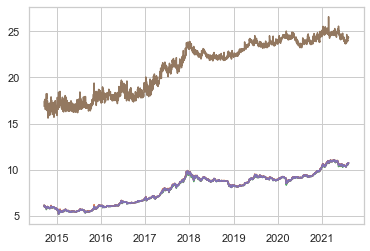

In [341]:
tsdf_logtransform = np.log(tsdf)
plt.plot(tsdf_logtransform)

In [342]:
X_train = tsdf_logtransform[:int(0.8*(len(data)))]
X_test = tsdf_logtransform[int(0.8*(len(data))):]

In [343]:
model = VAR(endog=X_train)
model_fit = model.fit()

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [344]:
prediction = model_fit.forecast(model_fit.y, steps=len(X_test))

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [345]:
pred = pd.DataFrame(index=range(0,len(prediction)),columns=columns)

In [346]:
for j in range(len(columns)):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

In [347]:
for i in columns:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred[i], X_test[i])))

rmse value for Open is :  1.062642299687024
rmse value for High is :  1.0660963676308506
rmse value for Low is :  1.0585920414508225
rmse value for Close is :  1.064552292870336
rmse value for Adj_Close is :  1.0645522928703368
rmse value for Volume is :  1.1622976769573015


In [348]:
from sklearn import metrics

In [349]:
print('Mean Absolute Error :', metrics.mean_absolute_error(pred['Close'], X_test['Close']))
print('Mean Squared Error:', metrics.mean_squared_error(pred['Close'], X_test['Close']))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(pred['Close'], X_test['Close'])))

Mean Absolute Error : 0.8657658181083476
Mean Squared Error: 1.1332715842554895
Root Mean Squared Error 1.064552292870336


In [350]:
X_testclose = X_test['Close'].reset_index(drop=True)
X_testclose

0       8.807032
1       8.812314
2       8.774900
3       8.739087
4       8.686437
         ...    
499    10.664679
500    10.704498
501    10.687346
502    10.744309
503    10.723745
Name: Close, Length: 504, dtype: float64

In [351]:
errors = abs(pred['Close'] - X_testclose)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / X_testclose)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.87 degrees.
Accuracy: 91.68 %.


In [352]:
X_testclose

0       8.807032
1       8.812314
2       8.774900
3       8.739087
4       8.686437
         ...    
499    10.664679
500    10.704498
501    10.687346
502    10.744309
503    10.723745
Name: Close, Length: 504, dtype: float64

In [357]:
y_pred = pred['Close']
y_pred = y_pred

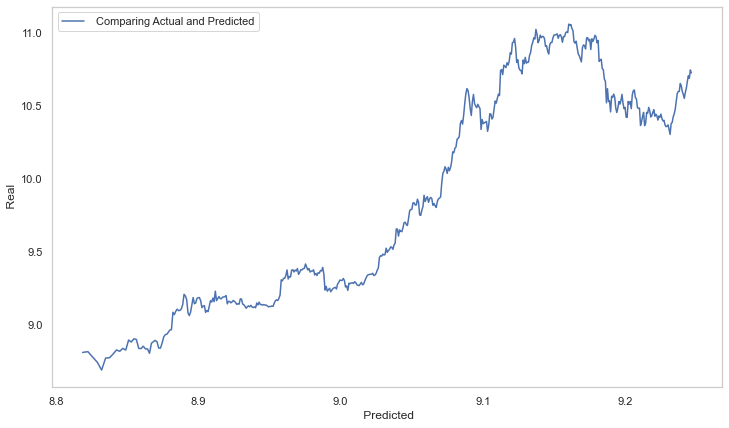

In [360]:
pfig = plt.figure(figsize=(12, 7)) # make canvas of picture. figsize is optional
plt.plot(y_pred, X_testclose, label=" Comparing Actual and Predicted") # draw line (label is optional)

plt.grid() # optional
plt.xlabel(" Predicted")
plt.ylabel(" Real")

plt.legend(loc="best") # optional

In [291]:
pred['Close']

0       9269.987305
1       9733.721680
2       9328.197266
3       9377.013672
4       9670.739258
           ...     
450    42816.500000
451    44555.800780
452    43798.117190
453    46365.402340
454    45421.683590
Name: Close, Length: 455, dtype: float64

**ARIMA**

In [28]:
from statsmodels.tsa.arima.model import ARIMA

In [29]:
arima_df = pd.read_csv("bitcoin_price_Training - Training.csv",index_col= 'Date')
print(df.head(5)) 
arima_df.info()
arima_df.index = pd.to_datetime(arima_df.index)
print(arima_df.index)
arima_df.head(5)

                 Open     High      Low    Close         Volume  \
Date                                                              
Jul 31, 2017  2763.24  2889.62  2720.61  2875.34    860,575,000   
Jul 30, 2017  2724.39  2758.53  2644.85  2757.18    705,943,000   
Jul 29, 2017  2807.02  2808.76  2692.80  2726.45    803,746,000   
Jul 28, 2017  2679.73  2897.45  2679.73  2809.01  1,380,100,000   
Jul 27, 2017  2538.71  2693.32  2529.34  2671.78    789,104,000   

                  Market Cap  
Date                          
Jul 31, 2017  45,535,800,000  
Jul 30, 2017  44,890,700,000  
Jul 29, 2017  46,246,700,000  
Jul 28, 2017  44,144,400,000  
Jul 27, 2017  41,816,500,000  
<class 'pandas.core.frame.DataFrame'>
Index: 1556 entries, Jul 31, 2017 to Apr 28, 2013
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1556 non-null   float64
 1   High        1556 non-null   float64
 2   Low         1556 non-nul

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [30]:
a_data = arima_df.copy()

In [85]:
a_data = a_data.sort_index()

In [86]:
a_data.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"


In [87]:
a_data.mean()

Open     582.625328
High     597.992847
Low      567.851446
Close    584.239396
dtype: float64

In [88]:
adf=a_data.copy() #Arima Dataframe

In [91]:
adf.isna().sum()

Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [93]:
cdf = adf['Close'] #Close Column Dataframe

Text(0, 0.5, 'Weekly bitcoin price')

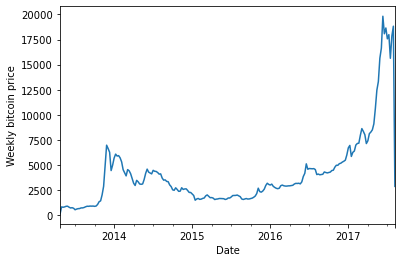

In [94]:
weekly = cdf.resample('W').sum()
weekly.plot()
plt.ylabel('Weekly bitcoin price')

In [95]:
tsdf = cdf

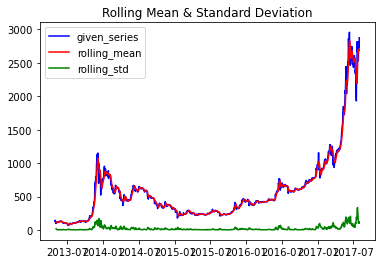

Results of Dickey-Fuller Test:
Test Statistic                    2.535589
p-value                           0.999060
#Lags Used                       24.000000
Number of Observations Used    1531.000000
Critical Value (1%)              -3.434628
Critical Value (5%)              -2.863430
Critical Value (10%)             -2.567776
dtype: float64


In [96]:
from statsmodels.tsa.stattools import adfuller
def test_for_stationary(input_data):
    r_mean = input_data.rolling(window = 7,center=False).mean()
    r_std = input_data.rolling(window = 7,center=False).std()
    
    # plotting the data
    given = plt.plot(input_data, color = 'blue', label = 'given_series')
    rolling_mean = plt.plot(r_mean, color = 'red', label = 'rolling_mean')
    rolling_std = plt.plot(r_std, color ='green', label = 'rolling_std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
     #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(input_data)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
      
test_for_stationary(tsdf)    

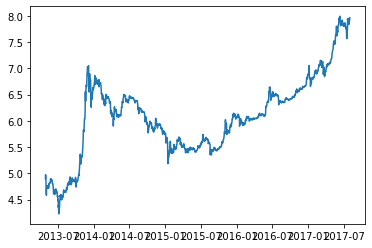

In [97]:
tsdf_logtransform = np.log(tsdf)
plt.plot(tsdf_logtransform)

In [98]:
tsdf_logtransform.head(10)

Date
2013-04-28    4.899406
2013-04-29    4.973556
2013-04-30    4.934474
2013-05-01    4.762088
2013-05-02    4.655958
2013-05-03    4.582413
2013-05-04    4.722953
2013-05-05    4.752814
2013-05-06    4.721174
2013-05-07    4.714025
Name: Close, dtype: float64

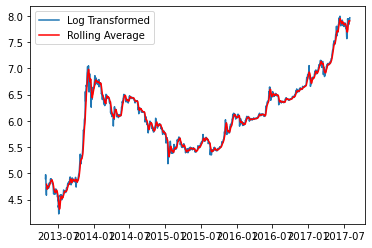

In [99]:
rolling_average = tsdf_logtransform.rolling(window = 7, center= False).mean()
plt.plot(tsdf_logtransform, label = 'Log Transformed')
plt.plot(rolling_average, color = 'red', label = 'Rolling Average')
plt.legend(loc = 'best')

In [100]:
rolling_average.head(10)

Date
2013-04-28         NaN
2013-04-29         NaN
2013-04-30         NaN
2013-05-01         NaN
2013-05-02         NaN
2013-05-03         NaN
2013-05-04    4.790121
2013-05-05    4.769180
2013-05-06    4.733125
2013-05-07    4.701632
Name: Close, dtype: float64

In [101]:
log_Rolling_difference = tsdf_logtransform - rolling_average
log_Rolling_difference.head(10)
log_Rolling_difference.tail(10)

Date
2017-07-22    0.151593
2017-07-23    0.073239
2017-07-24    0.051861
2017-07-25   -0.030130
2017-07-26   -0.063797
2017-07-27   -0.001463
2017-07-28    0.041254
2017-07-29    0.015741
2017-07-30    0.025554
2017-07-31    0.061402
Name: Close, dtype: float64

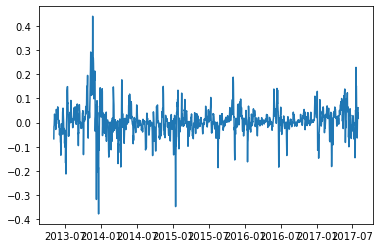

In [102]:
log_Rolling_difference.dropna(inplace=True)
plt.plot(log_Rolling_difference)

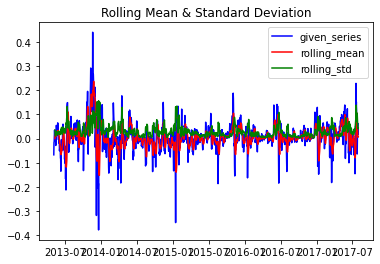

Results of Dickey-Fuller Test:
Test Statistic                -7.191326e+00
p-value                        2.499260e-10
#Lags Used                     2.200000e+01
Number of Observations Used    1.527000e+03
Critical Value (1%)           -3.434640e+00
Critical Value (5%)           -2.863435e+00
Critical Value (10%)          -2.567779e+00
dtype: float64


In [103]:
test_for_stationary(log_Rolling_difference)

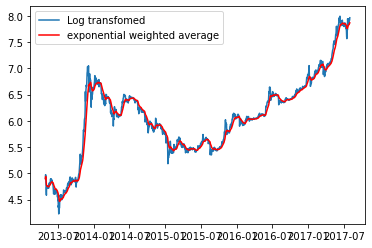

In [104]:
exp_wighted_avg = tsdf_logtransform.ewm(halflife=7,min_periods=0,adjust=True,ignore_na=False).mean()
plt.plot(tsdf_logtransform, label = 'Log transfomed')
plt.plot(exp_wighted_avg, color='red', label = 'exponential weighted average')
plt.legend(loc = 'best')

In [105]:
exp_wighted_avg.head(10)

Date
2013-04-28    4.899406
2013-04-29    4.938315
2013-04-30    4.936906
2013-05-01    4.886513
2013-05-02    4.830850
2013-05-03    4.778564
2013-05-04    4.768079
2013-05-05    4.765448
2013-05-06    4.758372
2013-05-07    4.751720
Name: Close, dtype: float64

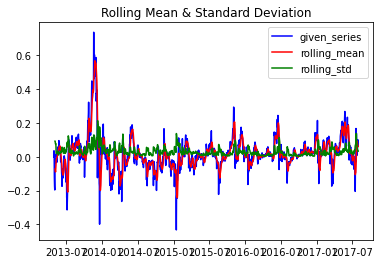

Results of Dickey-Fuller Test:
Test Statistic                   -5.442038
p-value                           0.000003
#Lags Used                       23.000000
Number of Observations Used    1532.000000
Critical Value (1%)              -3.434626
Critical Value (5%)              -2.863428
Critical Value (10%)             -2.567775
dtype: float64


In [106]:
log_expmovwt_diff = tsdf_logtransform - exp_wighted_avg

test_for_stationary(log_expmovwt_diff)

<AxesSubplot:xlabel='Date'>

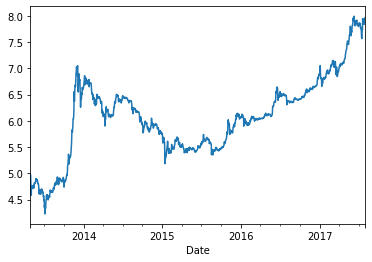

In [107]:
tsdf_logtransform.plot()


Date
2013-04-28         NaN
2013-04-29         NaN
2013-04-30         NaN
2013-05-01         NaN
2013-05-02         NaN
2013-05-03         NaN
2013-05-04         NaN
2013-05-05   -0.146592
2013-05-06   -0.252382
2013-05-07   -0.220449
Name: Close, dtype: float64

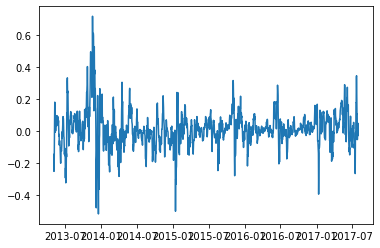

In [108]:
tsdf_diff_logtrans = tsdf_logtransform -tsdf_logtransform.shift(7)
plt.plot(tsdf_diff_logtrans)
tsdf_diff_logtrans.head(10)

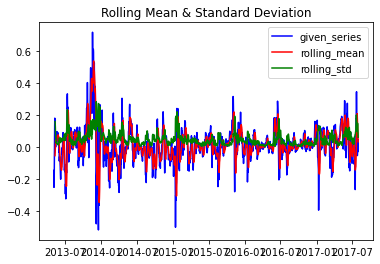

Results of Dickey-Fuller Test:
Test Statistic                -6.523574e+00
p-value                        1.027774e-08
#Lags Used                     2.300000e+01
Number of Observations Used    1.525000e+03
Critical Value (1%)           -3.434645e+00
Critical Value (5%)           -2.863437e+00
Critical Value (10%)          -2.567780e+00
dtype: float64


In [109]:
tsdf_diff_logtrans.dropna(inplace=True)
test_for_stationary(tsdf_diff_logtrans)

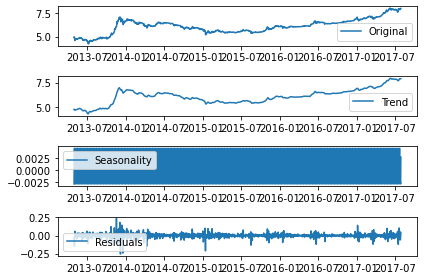

In [110]:
from statsmodels.tsa.seasonal import seasonal_decompose


decomposition = seasonal_decompose(tsdf_logtransform)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(tsdf_logtransform, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

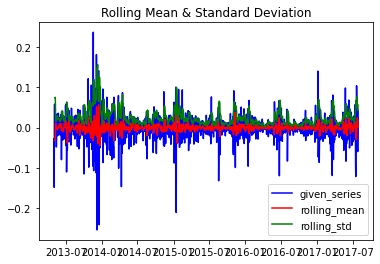

Results of Dickey-Fuller Test:
Test Statistic                -1.256779e+01
p-value                        2.035387e-23
#Lags Used                     2.300000e+01
Number of Observations Used    1.526000e+03
Critical Value (1%)           -3.434642e+00
Critical Value (5%)           -2.863436e+00
Critical Value (10%)          -2.567779e+00
dtype: float64


In [111]:
decomposed_TS = residual
decomposed_TS.dropna(inplace=True)
test_for_stationary(decomposed_TS)

In [112]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(tsdf_diff_logtrans, nlags=30)
lag_pacf = pacf(tsdf_diff_logtrans, nlags=50, method='ols')

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Text(0.5, 1.0, 'Autocorrelation Function')

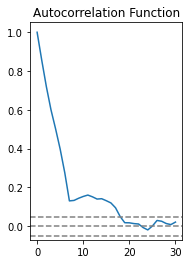

In [113]:
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(tsdf_diff_logtrans)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(tsdf_diff_logtrans)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

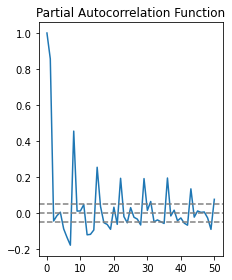

In [114]:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(tsdf_diff_logtrans)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(tsdf_diff_logtrans)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

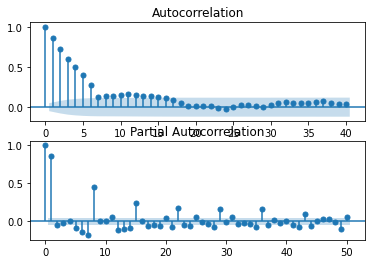

In [115]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure()
pyplot.subplot(211)
plot_acf(tsdf_diff_logtrans, ax=pyplot.gca(),lags=40)
pyplot.subplot(212)
plot_pacf(tsdf_diff_logtrans, ax=pyplot.gca(), lags=50)
pyplot.show()

In [116]:
from statsmodels.tsa.arima_model import ARIMA

tsdf_diff_logtrans = tsdf_diff_logtrans.fillna(0)

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so infe

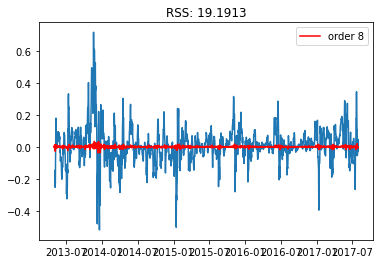

In [117]:
model = ARIMA(tsdf_logtransform, order=(8, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(tsdf_diff_logtrans)
plt.plot(results_AR.fittedvalues, color='red', label = 'order 8')
RSS = results_AR.fittedvalues-tsdf_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc = 'best')

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


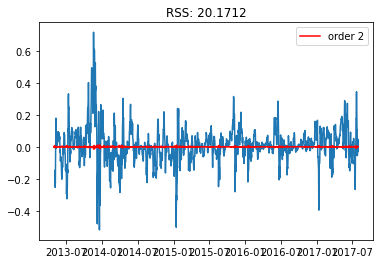

In [118]:
model = ARIMA(tsdf_logtransform, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(tsdf_diff_logtrans)
plt.plot(results_AR.fittedvalues, color='red', label = 'order 2')
RSS = results_AR.fittedvalues-tsdf_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc ='best')

In [119]:
print(results_AR.summary())


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1555
Model:                 ARIMA(2, 1, 0)   Log Likelihood                2704.690
Method:                       css-mle   S.D. of innovations              0.042
Date:                Thu, 06 Jan 2022   AIC                          -5401.380
Time:                        17:18:53   BIC                          -5379.984
Sample:                    04-29-2013   HQIC                         -5393.424
                         - 07-31-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0020      0.001      1.908      0.056   -5.37e-05       0.004
ar.L1.D.Close    -0.0011      0.025     -0.044      0.965      -0.051       0.049
ar.L2.D.Close    -0.0435      0.025     

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so infe

Text(0.5, 1.0, 'RSS: 19.0817')

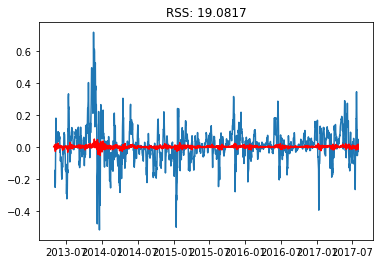

In [120]:
model = ARIMA(tsdf_logtransform, order=(0, 1,18)) 
results_MA = model.fit(disp=-1)  
plt.plot(tsdf_diff_logtrans)
plt.plot(results_MA.fittedvalues, color='red')
RSS = results_MA.fittedvalues-tsdf_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))

In [121]:
print(results_MA.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1555
Model:                ARIMA(0, 1, 18)   Log Likelihood                2727.323
Method:                       css-mle   S.D. of innovations              0.042
Date:                Thu, 06 Jan 2022   AIC                          -5414.646
Time:                        17:19:43   BIC                          -5307.661
Sample:                    04-29-2013   HQIC                         -5374.862
                         - 07-31-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0019      0.001      1.374      0.169      -0.001       0.005
ma.L1.D.Close     -0.0100      0.026     -0.390      0.697      -0.060       0.040
ma.L2.D.Close     -0.0373      0.025

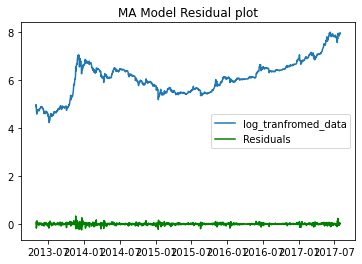

In [122]:
plt.plot(tsdf_logtransform, label = 'log_tranfromed_data')
plt.plot(results_MA.resid, color ='green',label= 'Residuals')
plt.title('MA Model Residual plot')
plt.legend(loc = 'best')

count    1555.000000
mean        0.000053
std         0.041911
min        -0.246817
25%        -0.013552
50%         0.000411
75%         0.015719
max         0.332676
dtype: float64


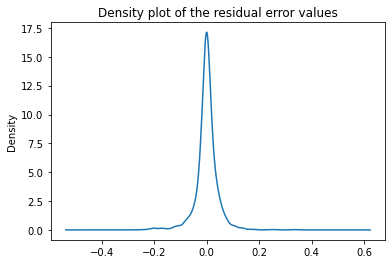

In [123]:
results_MA.resid.plot(kind='kde')
plt.title('Density plot of the residual error values')
print(results_MA.resid.describe())

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so infe

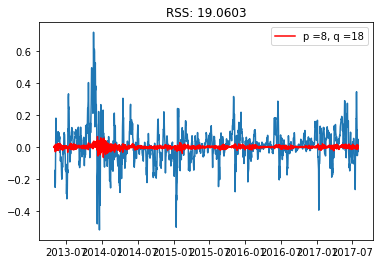

In [124]:
model = ARIMA(tsdf_logtransform, order=(8, 1, 18))  
results_ARIMA = model.fit(trend= 'nc', disp=-1)  
plt.plot(tsdf_diff_logtrans)
plt.plot(results_ARIMA.fittedvalues, color='red', label = 'p =8, q =18')
RSS =results_ARIMA.fittedvalues-tsdf_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc='best')

In [125]:
print(results_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1555
Model:                ARIMA(8, 1, 18)   Log Likelihood                2744.939
Method:                       css-mle   S.D. of innovations              0.041
Date:                Thu, 06 Jan 2022   AIC                          -5435.878
Time:                        17:39:41   BIC                          -5291.449
Sample:                    04-29-2013   HQIC                         -5382.170
                         - 07-31-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
ar.L1.D.Close     -1.2597      0.318     -3.965      0.000      -1.882      -0.637
ar.L2.D.Close     -0.7752      0.507     -1.529      0.126      -1.769       0.219
ar.L3.D.Close     -0.7146      0.417

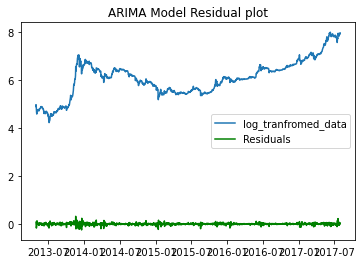

In [126]:
plt.plot(tsdf_logtransform, label = 'log_tranfromed_data')
plt.plot(results_ARIMA.resid, color ='green',label= 'Residuals')
plt.title('ARIMA Model Residual plot')
plt.legend(loc = 'best')

count    1555.000000
mean        0.001500
std         0.041420
min        -0.246335
25%        -0.012671
50%         0.001621
75%         0.018297
max         0.320604
dtype: float64


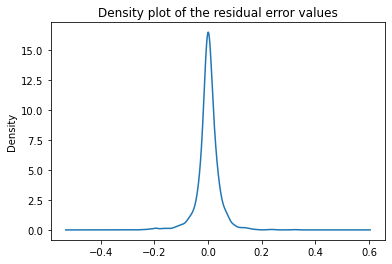

In [127]:
results_ARIMA.resid.plot(kind='kde')
plt.title('Density plot of the residual error values')
print(results_ARIMA.resid.describe())

In [128]:
test = pd.read_csv("bitcoin_price_1week_Test - Test.csv",index_col= 'Date')
test.index = pd.to_datetime(test.index)
test = test['Close']
test = test.sort_index()
test

Date
2017-08-01    2718.26
2017-08-02    2710.67
2017-08-03    2804.73
2017-08-04    2895.89
2017-08-05    3252.91
2017-08-06    3213.94
2017-08-07    3378.94
Name: Close, dtype: float64

In [129]:
test_logtransform = np.log(test)

In [130]:
history = [x for x in tsdf_logtransform]
predictions = list()
for t in range(len(test)):
    output = results_MA.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_logtransform[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_logtransform, predictions)
print('Test MSE: %.3f' % error)

predicted=7.963377, expected=7.907747
predicted=7.963377, expected=7.904951
predicted=7.963377, expected=7.939063
predicted=7.963377, expected=7.971048
predicted=7.963377, expected=8.087305
predicted=7.963377, expected=8.075253
predicted=7.963377, expected=8.125317
Test MSE: 0.009


In [288]:
errors = abs(yhat - obs)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / obs)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 0.3 degrees.
Accuracy = 98.01%


In [131]:
from matplotlib import pyplot as plt
from matplotlib.dates import MonthLocator, num2date
from matplotlib.ticker import FuncFormatter

In [132]:
from fbprophet import Prophet

In [133]:
cdf.head()

Date
2013-04-28    134.21
2013-04-29    144.54
2013-04-30    139.00
2013-05-01    116.99
2013-05-02    105.21
Name: Close, dtype: float64

In [134]:
df_prophet = cdf.copy()
df_prophet = pd.DataFrame(df_prophet)
df_prophet.reset_index(drop=False, inplace=True)
df_prophet.columns =['ds','y']
df_prophet

,ds,y
0,2013-04-28,134.21
1,2013-04-29,144.54
2,2013-04-30,139.00
3,2013-05-01,116.99
4,2013-05-02,105.21
...,...,...
1551,2017-07-27,2671.78
1552,2017-07-28,2809.01
1553,2017-07-29,2726.45
1554,2017-07-30,2757.18


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<AxesSubplot:xlabel='Date'>

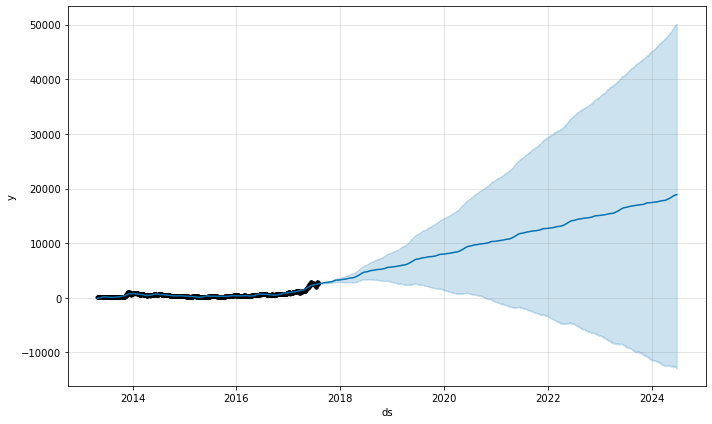

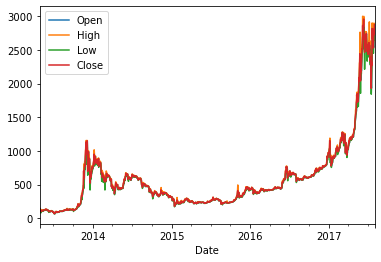

In [135]:
m = Prophet()
m.fit(df_prophet)
future = m.make_future_dataframe (periods=2520)#, freq='D')
forecast = m.predict(future)
m.plot(forecast)
data.plot()

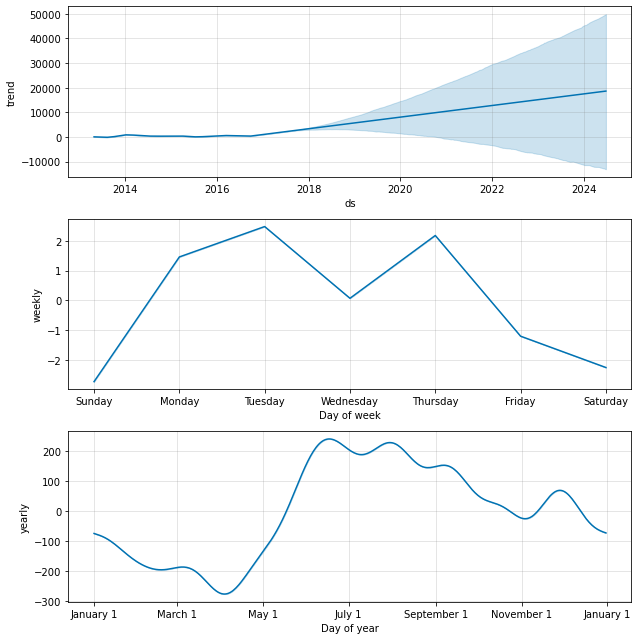

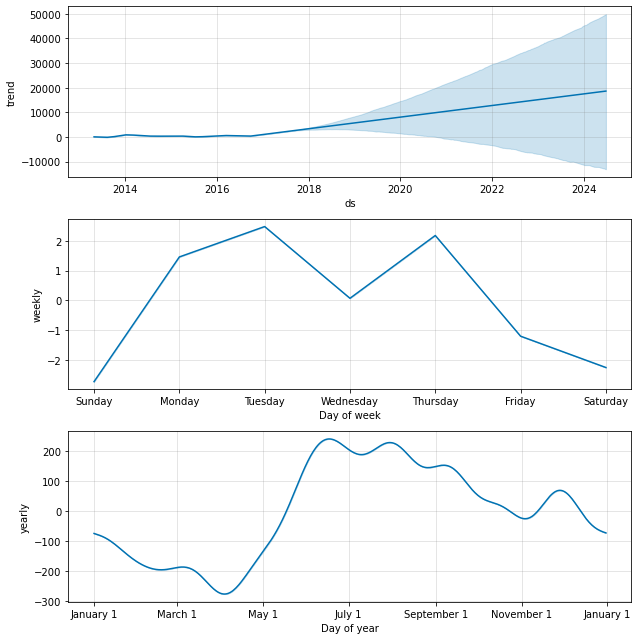

In [136]:
m.plot_components(forecast)

In [137]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [138]:
forecasted_values = forecast[['ds', 'yhat']].tail(7)

In [139]:
forecasted_values = forecasted_values.set_index('ds')
forecasted_values.columns = ['y']
forecasted_values

,y
ds,
2024-06-18,18848.865101
2024-06-19,18852.076356
2024-06-20,18859.306599
2024-06-21,18860.571578
2024-06-22,18863.754508
2024-06-23,18867.152329
2024-06-24,18874.912311


In [140]:
forecasted_values.count

<bound method DataFrame.count of                        y
ds                      
2024-06-18  18848.865101
2024-06-19  18852.076356
2024-06-20  18859.306599
2024-06-21  18860.571578
2024-06-22  18863.754508
2024-06-23  18867.152329
2024-06-24  18874.912311>

# Random Forrest 

In [17]:
import seaborn as sns


In [18]:
rfdf= data.copy()

In [19]:
rfdf.fillna(rfdf.mean())

,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...
2021-08-06,40865.867190,43271.660160,39932.179690,42816.500000,42816.500000,3.822648e+10
2021-08-07,42832.796880,44689.859380,42618.566410,44555.800780,44555.800780,4.003086e+10
2021-08-08,44574.437500,45282.351560,43331.910160,43798.117190,43798.117190,3.630266e+10


In [20]:
rfdf.fillna(rfdf.mean())
for i in df.columns[df.isnull().any(axis=0)]:     
    rfdf[i].fillna(rfdf[i].mean(),inplace=True)

In [21]:
rfdf.isnull().any()

Open         False
High         False
Low          False
Close        False
Adj_Close    False
Volume       False
dtype: bool

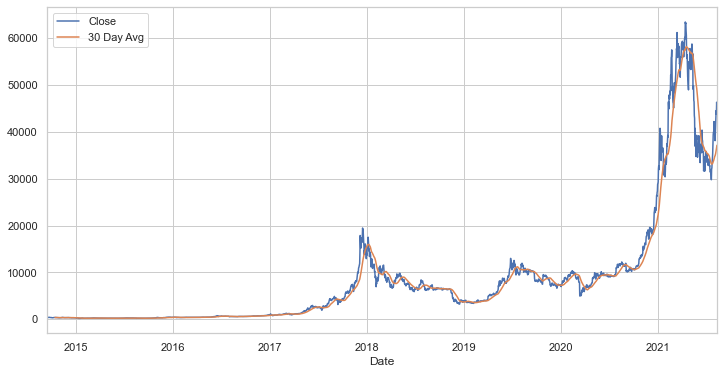

In [22]:
sns.set()
sns.set_style('whitegrid')
rfdf['Close'].plot(figsize=(12,6),label='Close')
rfdf['Close'].rolling(window=30).mean().plot(label='30 Day Avg')# Plotting the 
#rolling 30 day average against the Close Price
plt.legend()

In [23]:
rfdf['ohlc_average'] = (rfdf['Open'] + rfdf['High'] + rfdf['Low'] + rfdf['Close']) / 4


In [24]:
rfdf.head()

,Open,High,Low,Close,Adj_Close,Volume,ohlc_average
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0,460.948509
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0,437.815994
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0,407.816498
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0,404.188996
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0,403.128250


In [25]:
rfdf['Price_After_Month']=rfdf['Close'].shift(-30) #This will be our label

In [26]:
#Preprocessing
from sklearn import preprocessing
rfdf.dropna(inplace=True)
X=rfdf.drop('Price_After_Month',axis=1)
X=preprocessing.scale(X)#We need to scale our values to input them in our model
y=rfdf['Price_After_Month']

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [28]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=200,random_state=101)
reg.fit(X_train,y_train)
accuracy=reg.score(X_test,y_test)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('Accuracy is:',accuracy,'%')#This percentage shows how much our regression fits our data

Accuracy is: 94.2022 %


In [29]:
preds = reg.predict(X_test)
print("The prediction is:",preds[1],"But the real value is:" ,y_test[1])
#We can see that our predictions are kind of accurate but we still need to work on on them a lot. 

The prediction is: 249.04651867999968 But the real value is: 242.968994


In [30]:
#Apply our model and get our prediction
X_30=X[-30:]#We'll take the last 30 elements to make our predictions on them
forecast=reg.predict(X_30)

In [31]:
#creating a new column which contains the predictions! 
#Proceed at your own risk!  
from datetime import datetime, timedelta
last_date=rfdf.iloc[-1].name
modified_date = last_date + timedelta(days=1)
date=pd.date_range(modified_date,periods=30,freq='D')
df1=pd.DataFrame(forecast,columns=['Forecast'],index=date)
rfdf=rfdf.append(df1)
rfdf.tail()

,Open,High,Low,Close,Adj_Close,Volume,ohlc_average,Price_After_Month,Forecast
2021-08-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41942.990840
2021-08-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43694.996142
2021-08-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43353.823302
2021-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45235.307439
2021-08-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44419.233044


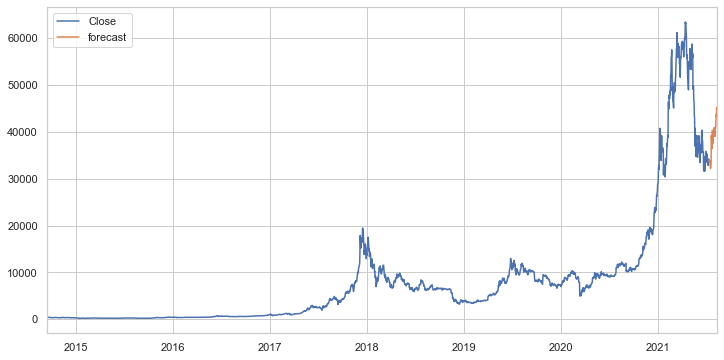

In [32]:
rfdf['Close'].plot(figsize=(12,6),label='Close')
rfdf['Forecast'].plot(label='forecast')
plt.legend()

# INSTALLING KERAS AND TERSONFLOW

In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

**Recurrent neural networks** 

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation
from keras.models import load_model

In [34]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [35]:
train_values = data.values[:,]

In [36]:
train_values = train_values.astype('float32')

In [37]:
n_train_rows = int(train_values.shape[0]*.8)-1

In [38]:
train_nn = data.iloc[:n_train_rows, :]
test_nn = data.iloc[n_train_rows:, :]

In [39]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_nn.values)
test_scaled = scaler.fit_transform(test_nn.values)

In [40]:
steps = 50


In [41]:
x_train = []
y_train = []

for i in range(steps, train_scaled.shape[0]-steps):
    x_train.append(train_scaled[i-steps:i, :])
    y_train.append(train_scaled[i, :])

x_train, y_train = np.array(x_train), np.array(y_train)

In [42]:
# Prepare the test data
x_test = []
y_test = []

for i in range(steps, test_scaled.shape[0]):
    x_test.append(test_scaled[i-steps:i, :])
    y_test.append(test_scaled[i, :])

x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)

(455, 50, 6)


In [43]:
model = Sequential()

In [44]:
(x_train.shape[1],6)

(50, 6)

In [45]:
epochs = 10
model.add(LSTM(units=50, return_sequences = True, input_shape = (x_train.shape[1],6)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=6))
model.compile(loss="mse", optimizer="adam")

In [46]:
model.fit(x_train, y_train, batch_size = 32, epochs = epochs)
model.summary


Epoch 1/10
60/60 [==============================] - 19s 176ms/step - loss: 0.0099
Epoch 2/10
60/60 [==============================] - 10s 168ms/step - loss: 0.0044
Epoch 3/10
60/60 [==============================] - 11s 178ms/step - loss: 0.0036
Epoch 4/10
60/60 [==============================] - 10s 160ms/step - loss: 0.0033
Epoch 5/10
60/60 [==============================] - 9s 142ms/step - loss: 0.0027
Epoch 6/10
60/60 [==============================] - 8s 130ms/step - loss: 0.0023
Epoch 7/10
60/60 [==============================] - 8s 125ms/step - loss: 0.0024
Epoch 8/10
60/60 [==============================] - 8s 126ms/step - loss: 0.0022
Epoch 9/10
60/60 [==============================] - 7s 118ms/step - loss: 0.0023
Epoch 10/10
60/60 [==============================] - 7s 122ms/step - loss: 0.0025


<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fd3abbcf040>>

In [47]:
print('\n# Evaluate on test data')
results = model.evaluate(x_test, y_test, batch_size=32)
print('test loss, test acc:', results)


# Evaluate on test data
15/15 [==============================] - 2s 35ms/step - loss: 0.0039
test loss, test acc: 0.0038650406058877707


In [48]:
y_hat = model.predict(x_test)
y_hat = scaler.inverse_transform(y_hat)

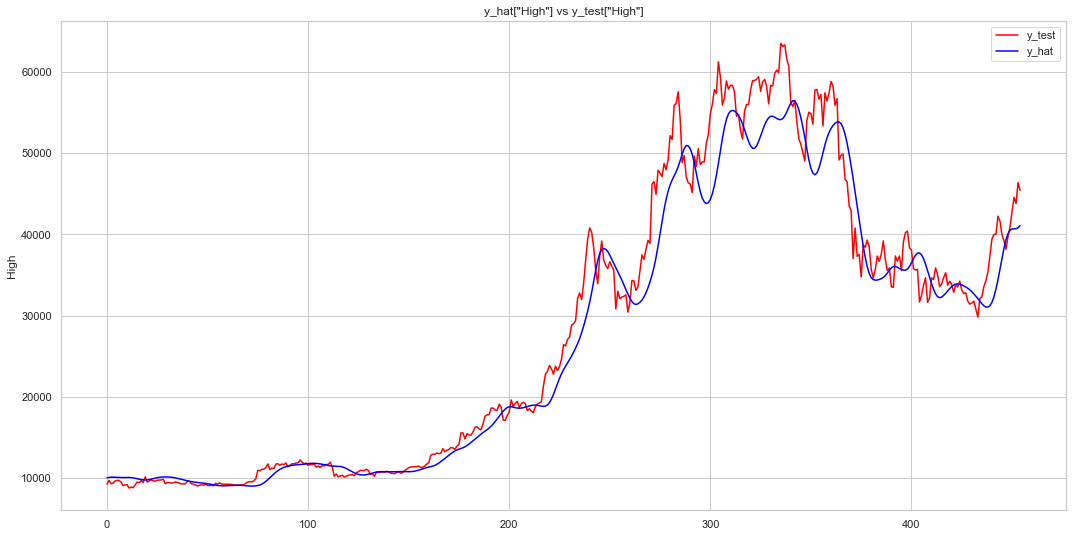

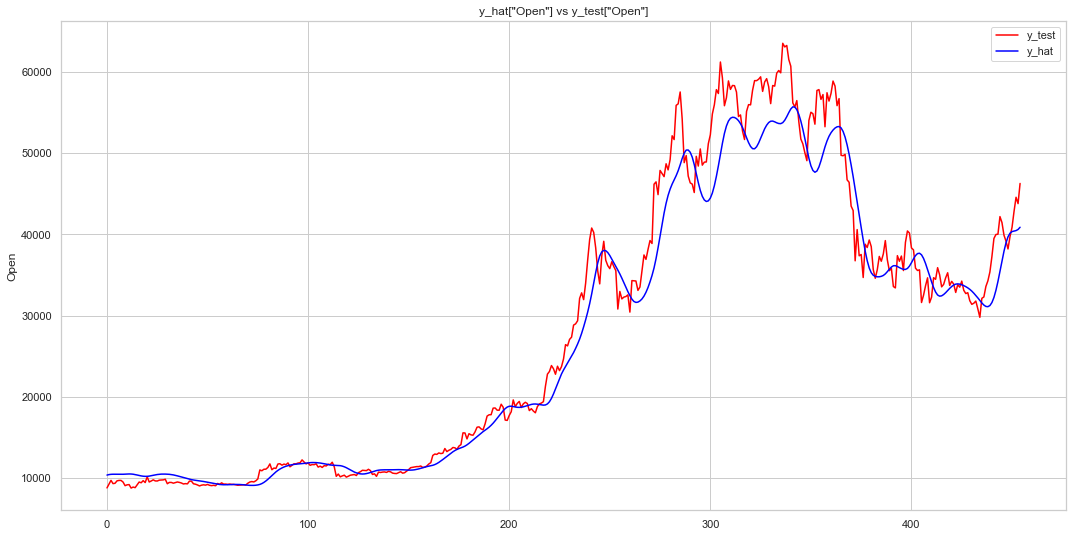

In [50]:
y_test = test_nn[steps:].reset_index()

# Visualise the ask_price predictions
plt.figure(figsize = (18,9))
plt.plot(y_test['Close'], color = 'red', label = 'y_test')
plt.plot(y_hat[:,0], color = 'blue', label = 'y_hat')
plt.title('y_hat["High"] vs y_test["High"]')
plt.ylabel('High')
plt.legend()
plt.show()

# Visualise the bid_price predictions
plt.figure(figsize = (18,9))
plt.plot(y_test['Open'], color = 'red', label = 'y_test')
plt.plot(y_hat[:,3], color = 'blue', label = 'y_hat')
plt.title('y_hat["Open"] vs y_test["Open"]')
plt.ylabel('Open')
plt.legend()
plt.show()

# Etherium 

In [160]:
edf = pd.read_csv('ETH-USD.csv')

In [161]:
edf.head

<bound method NDFrame.head of             Date         Open         High          Low        Close  \
0     2015-08-07     2.831620     3.536610     2.521120     2.772120   
1     2015-08-08     2.793760     2.798810     0.714725     0.753325   
2     2015-08-09     0.706136     0.879810     0.629191     0.701897   
3     2015-08-10     0.713989     0.729854     0.636546     0.708448   
4     2015-08-11     0.708087     1.131410     0.663235     1.067860   
...          ...          ...          ...          ...          ...   
2239  2021-09-23  3077.974365  3173.544678  3038.097900  3155.523682   
2240  2021-09-24  3154.562012  3159.644043  2747.337646  2931.669189   
2241  2021-09-25  2930.884766  2968.994629  2818.970459  2925.565674   
2242  2021-09-26  2926.343018  3114.857422  2744.583008  3062.265381   
2243  2021-09-27  3059.985352  3161.012695  3035.035645  3088.610596   

        Adj Close        Volume  
0        2.772120  1.643290e+05  
1        0.753325  6.741880e+05  
2  

In [162]:
edf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2.240000e+03
mean,475.582409,493.957221,455.099499,476.916970,476.916970,7.553882e+09
std,763.972342,795.231288,728.140467,765.958828,765.958828,1.083391e+10
min,0.431589,0.482988,0.420897,0.434829,0.434829,1.021280e+05
25%,14.487875,15.039400,13.819175,14.502750,14.502750,4.501810e+07
50%,206.910996,212.107422,201.405495,206.954498,206.954498,2.360430e+09
75%,433.895180,445.058823,419.880127,433.907005,433.907005,1.063769e+10
max,4174.635742,4362.350586,3868.994385,4168.701172,4168.701172,8.448291e+10


In [163]:
edf.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

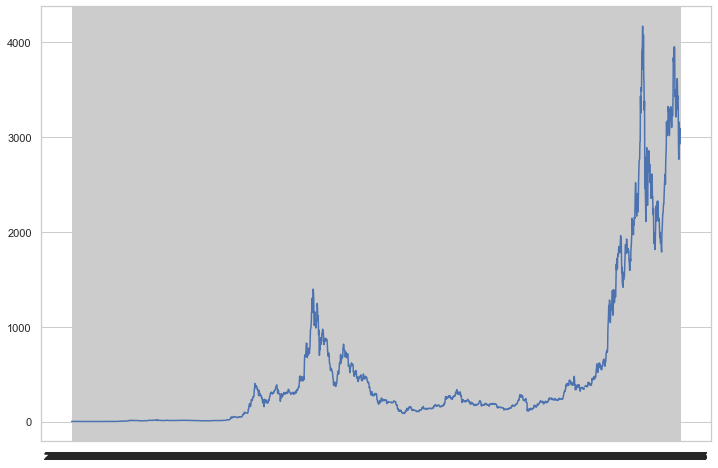

In [165]:
plt.figure(figsize=(12,8))
plt.plot(list(edf.Date), list(edf['Close'].values))
plt.show()

In [166]:
edf['Date'] = pd.to_datetime(edf.Date , format = '%Y/%m/%d')
data_e = edf.drop(['Date'], axis=1)
data_e.index = edf['Date']

In [167]:
data_e.columns = data_e.columns.str.replace(' ','_')

In [168]:
data_e.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume'], dtype='object')

In [171]:
data_e = data_e.ffill()

In [172]:
data_e.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj_Close    0
Volume       0
dtype: int64

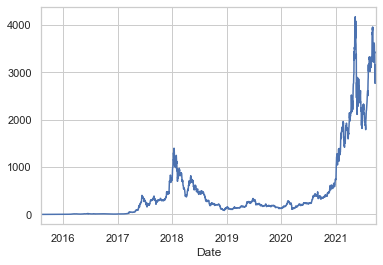

In [173]:
data_e['Adj_Close'].plot(grid=True)
plt.show()

In [159]:
#plt.figure(figsize=(12,8))
#plt.plot(list(.Date), list(df['Adj_Close'].values))
#plt.show()

# Corelation

In [242]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [243]:
data['Volume'].corr(data_e['Volume'])

0.9029786108372477

In [244]:
coor_data = data.join(data_e, how = 'left', lsuffix='left', rsuffix='right')

In [245]:
coor_data

,Openleft,Highleft,Lowleft,Closeleft,Adj_Closeleft,Volumeleft,Forecastleft,Openright,Highright,Lowright,Closeright,Adj_Closeright,Volumeright,Forecastright
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-05,NaN,NaN,NaN,NaN,NaN,NaN,3193.221221,3886.331055,3979.186523,3838.487305,3952.133545,3952.133545,1.837147e+10,NaN
2021-09-06,NaN,NaN,NaN,NaN,NaN,NaN,2963.264614,3951.520752,3968.426514,3868.994385,3928.379395,3928.379395,1.867469e+10,NaN
2021-09-07,NaN,NaN,NaN,NaN,NaN,NaN,2963.065799,3926.527588,3945.314209,3062.222412,3426.394287,3426.394287,3.913135e+10,NaN
2021-09-08,NaN,NaN,NaN,NaN,NaN,NaN,2996.388483,3428.378174,3559.121338,3224.764893,3497.315186,3497.315186,3.173843e+10,NaN


In [246]:
coor_data.pct_change()


,Openleft,Highleft,Lowleft,Closeleft,Adj_Closeleft,Volumeleft,Forecastleft,Openright,Highright,Lowright,Closeright,Adj_Closeright,Volumeright,Forecastright
2014-09-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,-0.019328,-0.024166,-0.086906,-0.071926,-0.071926,0.637628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,-0.071700,-0.063531,-0.069164,-0.069843,-0.069843,0.099657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-20,-0.069394,-0.010609,0.013916,0.035735,0.035735,-0.027851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-21,0.033983,-0.025679,0.008459,-0.024659,-0.024659,-0.278961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004206,-0.013098,0.002453,0.000145,0.016540,0.016540,-0.117052,NaN
2021-09-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.072014,0.016774,-0.002704,0.007948,-0.006010,-0.006010,0.016505,NaN
2021-09-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000067,-0.006325,-0.005824,-0.208522,-0.127784,-0.127784,1.095421,NaN
2021-09-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011246,-0.126868,-0.097886,0.053080,0.020698,0.020698,-0.188926,NaN


In [247]:
coor_data.diff()

,Openleft,Highleft,Lowleft,Closeleft,Adj_Closeleft,Volumeleft,Forecastleft,Openright,Highright,Lowright,Closeright,Adj_Closeright,Volumeright,Forecastright
2014-09-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,-9.004029,-11.314026,-39.317993,-32.894013,-32.894013,13426400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,-32.756988,-29.024994,-28.571991,-29.644012,-29.644012,3436500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-20,-29.429993,-4.539001,5.350983,14.108002,14.108002,-1056100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-21,13.411987,-10.869995,3.298004,-10.082978,-10.082978,-10283500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-05,NaN,NaN,NaN,NaN,NaN,NaN,13.374009,-51.579101,9.737793,0.556153,64.305176,64.305176,-2.435495e+09,NaN
2021-09-06,NaN,NaN,NaN,NaN,NaN,NaN,-229.956607,65.189697,-10.760009,30.507080,-23.754150,-23.754150,3.032226e+08,NaN
2021-09-07,NaN,NaN,NaN,NaN,NaN,NaN,-0.198815,-24.993164,-23.112305,-806.771973,-501.985108,-501.985108,2.045666e+10,NaN
2021-09-08,NaN,NaN,NaN,NaN,NaN,NaN,33.322683,-498.149414,-386.192871,162.542481,70.920899,70.920899,-7.392916e+09,NaN


In [248]:
btc_master = df.copy()
eth_master = edf.copy()

In [260]:
btc_master.isna().sum()

Date         0
Close        4
Adj_Close    4
Volume       4
dtype: int64

In [261]:
btc_master =btc_master.ffill()

In [262]:
btc_master.isna().sum()

Date         0
Close        0
Adj_Close    0
Volume       0
dtype: int64

In [263]:
eth_master = eth_master.ffill()

In [264]:
btc_master.drop(['Open', 'High','Low'], axis = 1, inplace = True)
#drop from ethereum 
eth_master.drop(['Open', 'High','Low'], axis = 1, inplace = True)

btc_master.columns

KeyError: "['Open' 'High' 'Low'] not found in axis"

In [265]:
btc_master.sort_values(by='Date',ascending=False)

eth_master.sort_values(by='Date',ascending=False)

,Date,Close,Adj Close,Volume
2243,2021-09-27,3088.610596,3088.610596,1.885929e+10
2242,2021-09-26,3062.265381,3062.265381,2.117277e+10
2241,2021-09-25,2925.565674,2925.565674,1.893279e+10
2240,2021-09-24,2931.669189,2931.669189,2.559542e+10
2239,2021-09-23,3155.523682,3155.523682,1.851629e+10
...,...,...,...,...
4,2015-08-11,1.067860,1.067860,1.463100e+06
3,2015-08-10,0.708448,0.708448,4.052830e+05
2,2015-08-09,0.701897,0.701897,5.321700e+05
1,2015-08-08,0.753325,0.753325,6.741880e+05


In [270]:
#Convert the object type Date column to datetime type
btc_master['Date'] = pd.to_datetime(btc_master['Date'], format='%Y/%m/%d')
eth_master['Date'] = pd.to_datetime(eth_master['Date'], format='%Y/%m/%d')

In [271]:
#Loose the time information
btc_master['Date'] = btc_master['Date'].dt.date

#Aggregate by date
btc_grouped = pd.pivot_table(btc_master, values=['Close', 'Volume'], index=['Date'],
                    aggfunc={'Close': np.mean,
                             'Volume': np.sum})

btc_grouped.head()

,Close,Volume
Date,,
2014-09-17,457.334015,21056800.0
2014-09-18,424.440002,34483200.0
2014-09-19,394.795990,37919700.0
2014-09-20,408.903992,36863600.0
2014-09-21,398.821014,26580100.0


In [272]:
#Loose the time information
eth_master['Date'] = eth_master['Date'].dt.date

#Aggregate by date
eth_grouped = pd.pivot_table(eth_master, values=['Close', 'Volume'], index=['Date'],
                    aggfunc={'Close': np.mean,
                             'Volume': np.sum})
eth_grouped.head()

,Close,Volume
Date,,
2015-08-07,2.772120,164329.0
2015-08-08,0.753325,674188.0
2015-08-09,0.701897,532170.0
2015-08-10,0.708448,405283.0
2015-08-11,1.067860,1463100.0


In [273]:
btc_master[~(btc_master['Date'].isin(eth_master["Date"]))]

,Date,Close,Adj_Close,Volume
0,2014-09-17,457.334015,457.334015,21056800.0
1,2014-09-18,424.440002,424.440002,34483200.0
2,2014-09-19,394.795990,394.795990,37919700.0
3,2014-09-20,408.903992,408.903992,36863600.0
4,2014-09-21,398.821014,398.821014,26580100.0
...,...,...,...,...
319,2015-08-02,282.614014,282.614014,17722200.0
320,2015-08-03,281.226990,281.226990,21474100.0
321,2015-08-04,285.217987,285.217987,21908700.0
322,2015-08-05,281.881989,281.881989,20128000.0


In [274]:
eth_master[~(eth_master['Date'].isin(btc_master["Date"]))]

,Date,Close,Adj Close,Volume
2196,2021-08-11,3164.245117,3164.245117,2.672904e+10
2197,2021-08-12,3043.414307,3043.414307,2.540370e+10
2198,2021-08-13,3322.211670,3322.211670,2.386887e+10
2199,2021-08-14,3265.443359,3265.443359,1.986086e+10
2200,2021-08-15,3310.504150,3310.504150,2.216621e+10
2201,2021-08-16,3156.509521,3156.509521,2.308004e+10
2202,2021-08-17,3014.845947,3014.845947,2.550906e+10
2203,2021-08-18,3020.089844,3020.089844,2.153925e+10
2204,2021-08-19,3182.702148,3182.702148,1.954629e+10
2205,2021-08-20,3286.935303,3286.935303,2.088562e+10


In [275]:
#Convert the object type Date column to datetime type
btc_master['Date'] = pd.to_datetime(btc_master['Date'], format='%Y/%m/%d')
eth_master['Date'] = pd.to_datetime(eth_master['Date'], format='%Y/%m/%d')

In [276]:
#Loose the time information
btc_master['Date'] = btc_master['Date'].dt.date

#Aggregate by date
btc_grouped = pd.pivot_table(btc_master, values=['Close', 'Volume'], index=['Date'],
                    aggfunc={'Close': np.mean,
                             'Volume': np.sum})

btc_grouped.head()

,Close,Volume
Date,,
2014-09-17,457.334015,21056800.0
2014-09-18,424.440002,34483200.0
2014-09-19,394.795990,37919700.0
2014-09-20,408.903992,36863600.0
2014-09-21,398.821014,26580100.0


In [277]:
#Loose the time information
eth_master['Date'] = eth_master['Date'].dt.date

#Aggregate by date
eth_grouped = pd.pivot_table(eth_master, values=['Close', 'Volume'], index=['Date'],
                    aggfunc={'Close': np.mean,
                             'Volume': np.sum})
eth_grouped.head()

,Close,Volume
Date,,
2015-08-07,2.772120,164329.0
2015-08-08,0.753325,674188.0
2015-08-09,0.701897,532170.0
2015-08-10,0.708448,405283.0
2015-08-11,1.067860,1463100.0


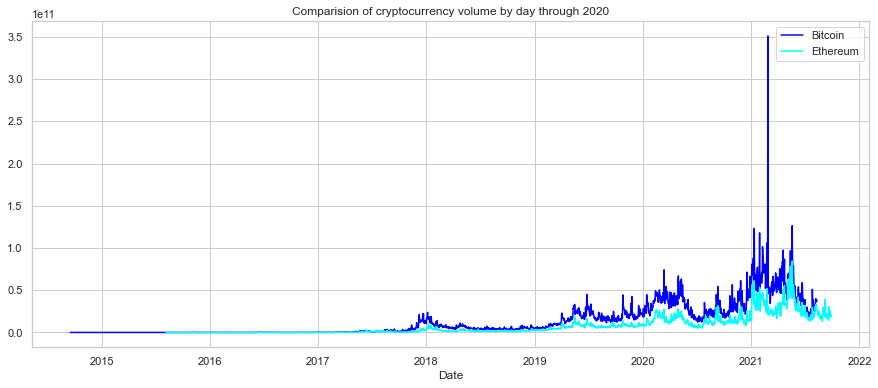

In [278]:
#Plot all the three currencies together to understand the trend of volume transcted by day
plt.figure(figsize=(15,6))
btc_grouped['Volume'].plot(c='blue')
eth_grouped['Volume'].plot(c='cyan')
plt.title('Comparision of cryptocurrency volume by day through 2020')
plt.legend(('Bitcoin','Ethereum'))
#plt.yscale('log')
plt.show()

In [279]:
#Merge bitcoin and ethereum data
btc_eth = pd.merge(btc_grouped, eth_grouped, suffixes=('_btc', '_eth'), left_index=True, right_index=True)
btc_eth.head()

,Close_btc,Volume_btc,Close_eth,Volume_eth
Date,,,,
2015-08-07,279.584991,42484800.0,2.772120,164329.0
2015-08-08,260.997009,58533000.0,0.753325,674188.0
2015-08-09,265.083008,23789600.0,0.701897,532170.0
2015-08-10,264.470001,20979400.0,0.708448,405283.0
2015-08-11,270.385986,25433900.0,1.067860,1463100.0


In [280]:
btc_eth.corr()

,Close_btc,Volume_btc,Close_eth,Volume_eth
Close_btc,1.000000,0.775412,0.907592,0.829409
Volume_btc,0.775412,1.000000,0.620508,0.902992
Close_eth,0.907592,0.620508,1.000000,0.763924
Volume_eth,0.829409,0.902992,0.763924,1.000000


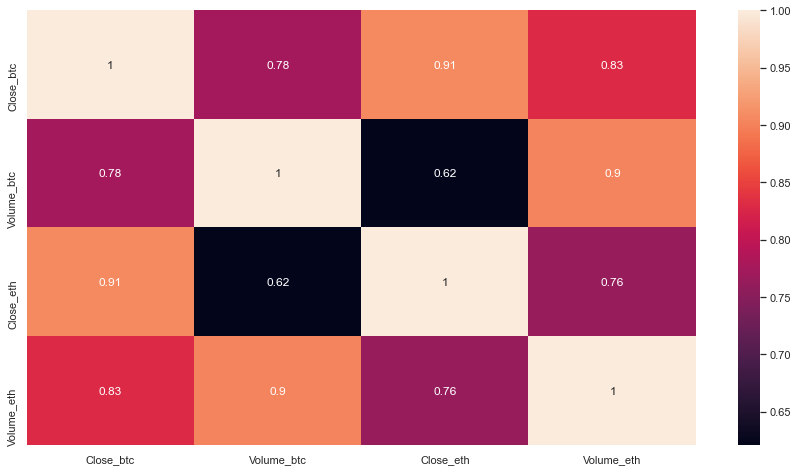

In [281]:
plt.figure(figsize = (15,8))
sns.heatmap(btc_eth.corr(), annot = True)
plt.show()

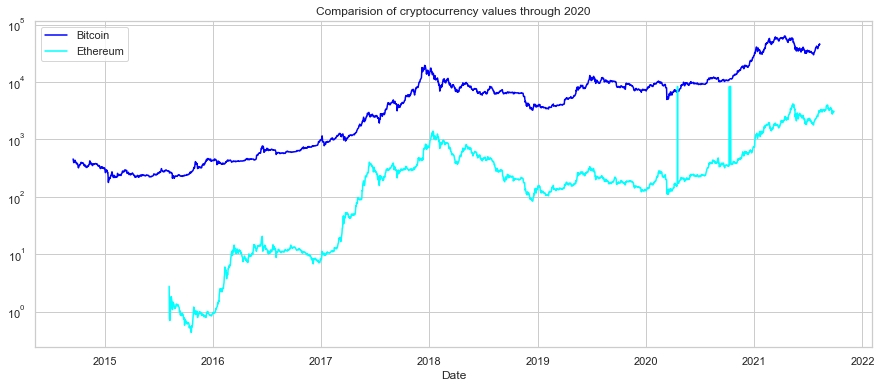

In [113]:
plt.figure(figsize=(15,6))
btc_grouped['Close'].plot(c='blue')
eth_grouped['Close'].plot(c='cyan')
plt.title('Comparision of cryptocurrency values through 2020')
plt.legend(('Bitcoin','Ethereum'))
plt.yscale('log')
plt.show()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
btc_master = pd.read_csv('BTC-USD.csv')

eth_master = pd.read_csv('ETH-USD.csv')

In [4]:
btc_master['Diff']= btc_master['Open'].diff()

In [5]:
eth_master['Diff']= eth_master['Open'].diff()

In [6]:
btc_master['R_D']= btc_master['Close'].diff()

In [7]:
eth_master['R_D']= eth_master['Close'].diff()

In [8]:
#btc_master.tail

In [9]:
#eth_master['Open']

In [10]:
#Convert the object type Date column to datetime type
btc_master['Date'] = pd.to_datetime(btc_master['Date'], format='%d/%m/%Y')
eth_master['Date'] = pd.to_datetime(eth_master['Date'], format='%Y/%m/%d')

In [11]:
btc_master.sort_values(by='Date',ascending=False)

,Date,Open,High,Low,Close,Adj Close,Volume,Diff,R_D
2519,2021-08-10,46274.191410,46503.171880,45359.714840,45421.683590,45421.683590,3.662346e+10,2482.265630,-943.718750
2518,2021-08-09,43791.925780,46456.832030,42848.687500,46365.402340,46365.402340,3.873408e+10,-782.511720,2567.285150
2517,2021-08-08,44574.437500,45282.351560,43331.910160,43798.117190,43798.117190,3.630266e+10,1741.640620,-757.683590
2516,2021-08-07,42832.796880,44689.859380,42618.566410,44555.800780,44555.800780,4.003086e+10,1966.929690,1739.300780
2515,2021-08-06,40865.867190,43271.660160,39932.179690,42816.500000,42816.500000,3.822648e+10,1121.351560,1946.945310
...,...,...,...,...,...,...,...,...,...
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07,13.411987,-10.082978
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07,-29.429993,14.108002
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07,-32.756988,-29.644012
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07,-9.004029,-32.894013


In [12]:
pip install pyjanitor

Note: you may need to restart the kernel to use updated packages.


In [13]:
import janitor

btc_master_filtered = btc_master.filter_date('Date', '2015-8-7', '2021-8-10')

In [14]:
btc_master_filtered

,Date,Open,High,Low,Close,Adj Close,Volume,Diff,R_D
324,2015-08-07,278.740997,280.391998,276.365997,279.584991,279.584991,4.248480e+07,-3.165009,1.007995
325,2015-08-08,279.742004,279.928009,260.709991,260.997009,260.997009,5.853300e+07,1.001007,-18.587982
326,2015-08-09,261.115997,267.002991,260.467987,265.083008,265.083008,2.378960e+07,-18.626007,4.085999
327,2015-08-10,265.477997,267.032013,262.596008,264.470001,264.470001,2.097940e+07,4.362000,-0.613007
328,2015-08-11,264.342010,270.385986,264.093994,270.385986,270.385986,2.543390e+07,-1.135987,5.915985
...,...,...,...,...,...,...,...,...,...
2515,2021-08-06,40865.867190,43271.660160,39932.179690,42816.500000,42816.500000,3.822648e+10,1121.351560,1946.945310
2516,2021-08-07,42832.796880,44689.859380,42618.566410,44555.800780,44555.800780,4.003086e+10,1966.929690,1739.300780
2517,2021-08-08,44574.437500,45282.351560,43331.910160,43798.117190,43798.117190,3.630266e+10,1741.640620,-757.683590
2518,2021-08-09,43791.925780,46456.832030,42848.687500,46365.402340,46365.402340,3.873408e+10,-782.511720,2567.285150


In [15]:
eth_master_filtered = eth_master.filter_date('Date', '2015-8-7', '2021-8-10')

In [16]:
eth_master_filtered

,Date,Open,High,Low,Close,Adj Close,Volume,Diff,R_D
0,2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,1.643290e+05,NaN,NaN
1,2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,6.741880e+05,-0.037860,-2.018795
2,2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,5.321700e+05,-2.087624,-0.051428
3,2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,4.052830e+05,0.007853,0.006551
4,2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1.463100e+06,-0.005902,0.359412
...,...,...,...,...,...,...,...,...,...
2191,2021-08-06,2827.503418,2944.903320,2727.792725,2890.941650,2890.941650,2.652858e+10,101.833740,63.612793
2192,2021-08-07,2891.707520,3170.229736,2868.535645,3157.238770,3157.238770,3.308147e+10,64.204102,266.297120
2193,2021-08-08,3161.232666,3184.604004,2951.747314,3013.732666,3013.732666,2.843364e+10,269.525146,-143.506104
2194,2021-08-09,3012.885742,3185.701172,2900.926025,3167.856201,3167.856201,3.198326e+10,-148.346924,154.123535


In [17]:
btc_master_filtered['Diff']

324       -3.165009
325        1.001007
326      -18.626007
327        4.362000
328       -1.135987
           ...     
2515    1121.351560
2516    1966.929690
2517    1741.640620
2518    -782.511720
2519    2482.265630
Name: Diff, Length: 2196, dtype: float64

In [18]:
btc_master_filtered['R_D'].loc[(btc_master_filtered['Diff'] < 0 )] = "Raise"

btc_master_filtered['R_D'].loc[(btc_master_filtered['Diff'] > 0 )] = "Drop"


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [19]:
btc_master_filtered

,Date,Open,High,Low,Close,Adj Close,Volume,Diff,R_D
324,2015-08-07,278.740997,280.391998,276.365997,279.584991,279.584991,4.248480e+07,-3.165009,Raise
325,2015-08-08,279.742004,279.928009,260.709991,260.997009,260.997009,5.853300e+07,1.001007,Drop
326,2015-08-09,261.115997,267.002991,260.467987,265.083008,265.083008,2.378960e+07,-18.626007,Raise
327,2015-08-10,265.477997,267.032013,262.596008,264.470001,264.470001,2.097940e+07,4.362000,Drop
328,2015-08-11,264.342010,270.385986,264.093994,270.385986,270.385986,2.543390e+07,-1.135987,Raise
...,...,...,...,...,...,...,...,...,...
2515,2021-08-06,40865.867190,43271.660160,39932.179690,42816.500000,42816.500000,3.822648e+10,1121.351560,Drop
2516,2021-08-07,42832.796880,44689.859380,42618.566410,44555.800780,44555.800780,4.003086e+10,1966.929690,Drop
2517,2021-08-08,44574.437500,45282.351560,43331.910160,43798.117190,43798.117190,3.630266e+10,1741.640620,Drop
2518,2021-08-09,43791.925780,46456.832030,42848.687500,46365.402340,46365.402340,3.873408e+10,-782.511720,Raise


In [20]:
eth_master_filtered['R_D'].loc[(eth_master_filtered['Diff'] < 0 )] = "Raise"

eth_master_filtered['R_D'].loc[(eth_master_filtered['Diff'] > 0 )] = "Drop"


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [21]:
eth_master_filtered

,Date,Open,High,Low,Close,Adj Close,Volume,Diff,R_D
0,2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,1.643290e+05,NaN,NaN
1,2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,6.741880e+05,-0.037860,Raise
2,2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,5.321700e+05,-2.087624,Raise
3,2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,4.052830e+05,0.007853,Drop
4,2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1.463100e+06,-0.005902,Raise
...,...,...,...,...,...,...,...,...,...
2191,2021-08-06,2827.503418,2944.903320,2727.792725,2890.941650,2890.941650,2.652858e+10,101.833740,Drop
2192,2021-08-07,2891.707520,3170.229736,2868.535645,3157.238770,3157.238770,3.308147e+10,64.204102,Drop
2193,2021-08-08,3161.232666,3184.604004,2951.747314,3013.732666,3013.732666,2.843364e+10,269.525146,Drop
2194,2021-08-09,3012.885742,3185.701172,2900.926025,3167.856201,3167.856201,3.198326e+10,-148.346924,Raise


In [22]:
eth_master_filtered['R_D'].equals(btc_master_filtered['R_D'])


False

In [23]:
#conditions = [eth_master_filtered['R_D'] == btc_master_filtered['R_D'],
#choices += 1

In [24]:

#if eth_master_filtered['R_D'] == btc_master_filtered['R_D'] :
    #count += 1

In [25]:
btc_eth = pd.merge(btc_master_filtered, eth_master_filtered, suffixes=('_btc', '_eth'), left_index=True, right_index=True)
btc_eth

,Date_btc,Open_btc,High_btc,Low_btc,Close_btc,Adj Close_btc,Volume_btc,Diff_btc,R_D_btc,Date_eth,Open_eth,High_eth,Low_eth,Close_eth,Adj Close_eth,Volume_eth,Diff_eth,R_D_eth
324,2015-08-07,278.740997,280.391998,276.365997,279.584991,279.584991,4.248480e+07,-3.165009,Raise,2016-06-26,14.261100,14.373900,13.656500,13.850200,13.850200,1.474760e+07,-0.041700,Raise
325,2015-08-08,279.742004,279.928009,260.709991,260.997009,260.997009,5.853300e+07,1.001007,Drop,2016-06-27,13.808200,14.121100,13.749300,13.883900,13.883900,1.099470e+07,-0.452900,Raise
326,2015-08-09,261.115997,267.002991,260.467987,265.083008,265.083008,2.378960e+07,-18.626007,Raise,2016-06-28,13.927600,13.981500,11.718000,12.175600,12.175600,4.343660e+07,0.119400,Drop
327,2015-08-10,265.477997,267.032013,262.596008,264.470001,264.470001,2.097940e+07,4.362000,Drop,2016-06-29,12.174200,13.038000,11.685400,12.611200,12.611200,2.698280e+07,-1.753400,Raise
328,2015-08-11,264.342010,270.385986,264.093994,270.385986,270.385986,2.543390e+07,-1.135987,Raise,2016-06-30,12.602900,12.741900,12.253600,12.461500,12.461500,1.580130e+07,0.428700,Drop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2191,2020-09-16,10797.761720,11100.124020,10704.884770,10974.905270,10974.905270,3.076999e+10,120.006840,Drop,2021-08-06,2827.503418,2944.903320,2727.792725,2890.941650,2890.941650,2.652858e+10,101.833740,Drop
2192,2020-09-17,10973.251950,11037.420900,10774.627930,10948.990230,10948.990230,3.815181e+10,175.490230,Drop,2021-08-07,2891.707520,3170.229736,2868.535645,3157.238770,3157.238770,3.308147e+10,64.204102,Drop
2193,2020-09-18,10951.820310,11034.908200,10829.657230,10944.585940,10944.585940,2.634190e+10,-21.431640,Raise,2021-08-08,3161.232666,3184.604004,2951.747314,3013.732666,3013.732666,2.843364e+10,269.525146,Drop
2194,2020-09-19,10933.752930,11134.092770,10909.618160,11094.346680,11094.346680,2.276420e+10,-18.067380,Raise,2021-08-09,3012.885742,3185.701172,2900.926025,3167.856201,3167.856201,3.198326e+10,-148.346924,Raise


In [26]:
btc_eth['is_equal']= (btc_eth['R_D_btc']==btc_eth['R_D_eth'])
print(btc_eth)

       Date_btc      Open_btc      High_btc       Low_btc     Close_btc  \
324  2015-08-07    278.740997    280.391998    276.365997    279.584991   
325  2015-08-08    279.742004    279.928009    260.709991    260.997009   
326  2015-08-09    261.115997    267.002991    260.467987    265.083008   
327  2015-08-10    265.477997    267.032013    262.596008    264.470001   
328  2015-08-11    264.342010    270.385986    264.093994    270.385986   
...         ...           ...           ...           ...           ...   
2191 2020-09-16  10797.761720  11100.124020  10704.884770  10974.905270   
2192 2020-09-17  10973.251950  11037.420900  10774.627930  10948.990230   
2193 2020-09-18  10951.820310  11034.908200  10829.657230  10944.585940   
2194 2020-09-19  10933.752930  11134.092770  10909.618160  11094.346680   
2195 2020-09-20  11095.870120  11095.870120  10814.477540  10938.271480   

      Adj Close_btc    Volume_btc    Diff_btc R_D_btc   Date_eth     Open_eth  \
324      279.58499

In [27]:
same_drop_raise= (btc_eth["is_equal"]==True).count()
print(same_drop_raise)

1872


In [28]:
2195-1872

323

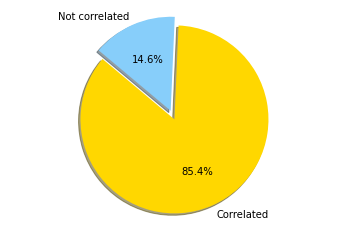

In [31]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'Correlated', 'Not correlated'
sizes = [1892, 323]
colors = ['gold',  'lightskyblue']
explode = (0.1, 0,)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

# Data preprocessing of Ethereum

In [174]:
data_e

,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,1.643290e+05
2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,6.741880e+05
2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,5.321700e+05
2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,4.052830e+05
2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1.463100e+06
...,...,...,...,...,...,...
2021-09-23,3077.974365,3173.544678,3038.097900,3155.523682,3155.523682,1.851629e+10
2021-09-24,3154.562012,3159.644043,2747.337646,2931.669189,2931.669189,2.559542e+10
2021-09-25,2930.884766,2968.994629,2818.970459,2925.565674,2925.565674,1.893279e+10


In [84]:
#edf['Date'] = pd.to_datetime(edf.Date , format = '%Y/%m/%d')
#edata = edf.drop(['Date'], axis=1)
#edata.index = edf['Date']

In [175]:
#edata.index

In [176]:
columns = data_e.columns
for col in columns:
    data_e[col].interpolate(method='time', inplace=True)

In [177]:
X_train = edata[:int(0.8*(len(data_e)))]
X_test = edata[int(0.8*(len(data_e))):]

# *Model* *Training*

**Vector Auto Regressor**

In [178]:
model = VAR(endog=X_train)
model_fit = model.fit()

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [179]:
prediction = model_fit.forecast(model_fit.y, steps=len(X_test))

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [180]:
pred = pd.DataFrame(index=range(0,len(prediction)),columns=columns)

In [181]:
for j in range(len(columns)):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

In [182]:
for i in columns:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred[i], X_test[i])))

rmse value for Open is :  1869.4725632570567
rmse value for High is :  1942.7942828074201
rmse value for Low is :  1786.372858802787
rmse value for Close is :  1874.9796781877094
rmse value for Adj_Close is :  1874.9796781877094
rmse value for Volume is :  23559857420.9746


In [183]:
e_X_testclose = X_test['Close'].reset_index(drop=True)
e_X_testclose

0       241.510223
1       239.075531
2       246.670013
3       243.015961
4       240.984985
          ...     
444    3155.523682
445    2931.669189
446    2925.565674
447    3062.265381
448    3088.610596
Name: Close, Length: 449, dtype: float64

In [184]:
# Calculate the absolute errors
errors = abs(pred['Close'] - e_X_testclose)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / e_X_testclose)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 1412.04 degrees.
Accuracy: 27.34 %.


In [189]:
tsedf = data_e

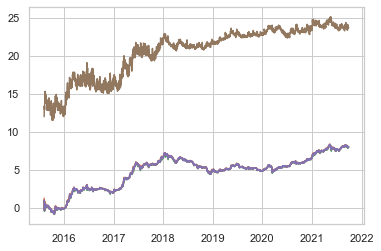

In [190]:
tsedf_logtransform = np.log(tsdf)
plt.plot(tsedf_logtransform)

In [191]:
X_train = tsedf_logtransform[:int(0.8*(len(data)))]
X_test = tsedf_logtransform[int(0.8*(len(data))):]

In [192]:
model = VAR(endog=X_train)
model_fit = model.fit()

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [193]:
prediction = model_fit.forecast(model_fit.y, steps=len(X_test))

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [194]:
pred = pd.DataFrame(index=range(0,len(prediction)),columns=columns)

In [195]:
for j in range(len(columns)):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

In [196]:
for i in columns:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred[i], X_test[i])))

rmse value for Open is :  0.37145817030156036
rmse value for High is :  0.3810995999201896
rmse value for Low is :  0.36117033109926405
rmse value for Close is :  0.3729872394395425
rmse value for Adj_Close is :  0.3729872394395436
rmse value for Volume is :  0.7160397712798404


In [197]:
from sklearn import metrics

In [198]:
print('Mean Absolute Error :', metrics.mean_absolute_error(pred['Close'], X_test['Close']))
print('Mean Squared Error:', metrics.mean_squared_error(pred['Close'], X_test['Close']))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(pred['Close'], X_test['Close'])))

Mean Absolute Error : 0.2998265660611018
Mean Squared Error: 0.13911948078473058
Root Mean Squared Error 0.3729872394395425


In [199]:
X_testclose = X_test['Close'].reset_index(drop=True)
X_testclose

0      7.519439
1      7.503350
2      7.498362
3      7.484251
4      7.484968
         ...   
223    8.056910
224    7.983327
225    7.981243
226    8.026910
227    8.035477
Name: Close, Length: 228, dtype: float64

In [200]:
errors = abs(pred['Close'] - X_testclose)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / X_testclose)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.3 degrees.
Accuracy: 96.24 %.


**Recurrent neural networks** 

In [96]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [97]:
train_values = data.values[:,]

In [98]:
train_values = train_values.astype('float32')

In [99]:
n_train_rows = int(train_values.shape[0]*.8)-1

In [100]:
train_nn = data.iloc[:n_train_rows, :]
test_nn = data.iloc[n_train_rows:, :]

In [101]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_nn.values)
test_scaled = scaler.fit_transform(test_nn.values)

In [102]:
steps = 50


In [103]:
x_train = []
y_train = []

for i in range(steps, train_scaled.shape[0]-steps):
    x_train.append(train_scaled[i-steps:i, :])
    y_train.append(train_scaled[i, :])

x_train, y_train = np.array(x_train), np.array(y_train)

In [104]:
# Prepare the test data
x_test = []
y_test = []

for i in range(steps, test_scaled.shape[0]):
    x_test.append(test_scaled[i-steps:i, :])
    y_test.append(test_scaled[i, :])

x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)

(455, 50, 6)


In [105]:
model = Sequential()

In [106]:
(x_train.shape[1],6)

(50, 6)

In [107]:
epochs = 10
model.add(LSTM(units=50, return_sequences = True, input_shape = (x_train.shape[1],6)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=6))
model.compile(loss="mse", optimizer="adam")

In [108]:
model.fit(x_train, y_train, batch_size = 32, epochs = epochs)
model.summary

Epoch 1/10
60/60 [==============================] - 21s 193ms/step - loss: 0.0121
Epoch 2/10
60/60 [==============================] - 13s 216ms/step - loss: 0.0042
Epoch 3/10
60/60 [==============================] - 13s 214ms/step - loss: 0.0039
Epoch 4/10
60/60 [==============================] - 12s 204ms/step - loss: 0.0034
Epoch 5/10
60/60 [==============================] - 12s 208ms/step - loss: 0.0031
Epoch 6/10
60/60 [==============================] - 8s 142ms/step - loss: 0.0027
Epoch 7/10
60/60 [==============================] - 12s 203ms/step - loss: 0.0023
Epoch 8/10
60/60 [==============================] - 12s 194ms/step - loss: 0.0024
Epoch 9/10
60/60 [==============================] - 9s 156ms/step - loss: 0.0022
Epoch 10/10
60/60 [==============================] - 12s 195ms/step - loss: 0.0021


<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fd3b51048e0>>

In [109]:
print('\n# Evaluate on test data')
results = model.evaluate(x_test, y_test, batch_size=32)
print('test loss, test acc:', results)


# Evaluate on test data
15/15 [==============================] - 4s 49ms/step - loss: 0.0032
test loss, test acc: 0.0032427143305540085


In [110]:
y_hat = model.predict(x_test)
y_hat = scaler.inverse_transform(y_hat)

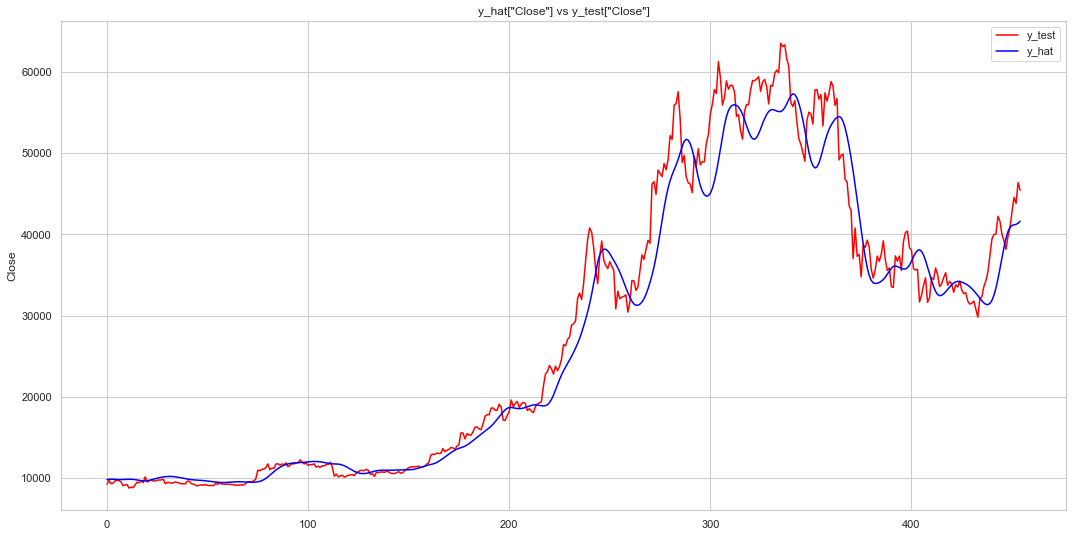

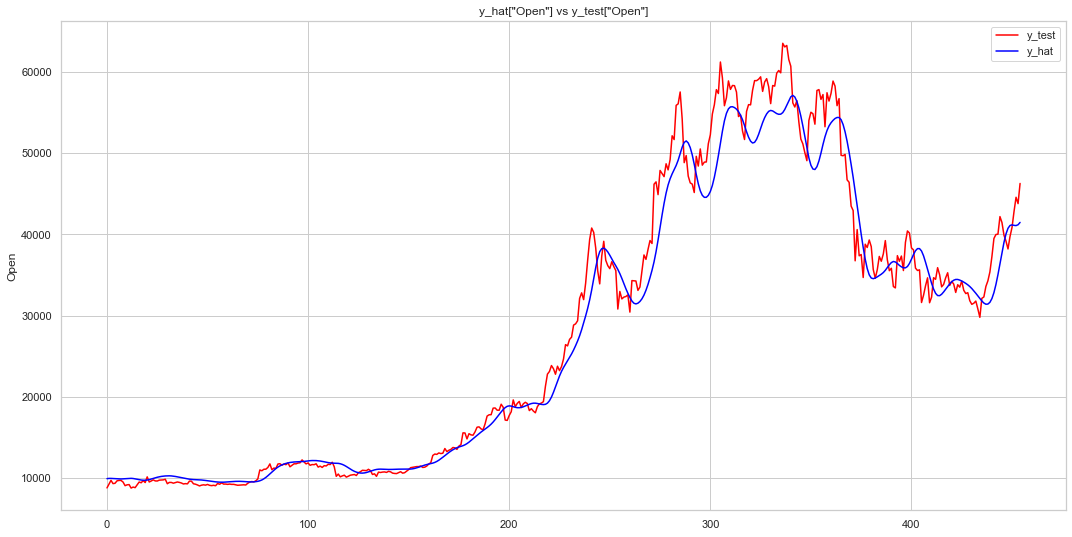

In [112]:
y_test = test_nn[steps:].reset_index()

# Visualise the ask_price predictions
plt.figure(figsize = (18,9))
plt.plot(y_test['Close'], color = 'red', label = 'y_test')
plt.plot(y_hat[:,0], color = 'blue', label = 'y_hat')
plt.title('y_hat["Close"] vs y_test["Close"]')
plt.ylabel('Close')
plt.legend()
plt.show()

# Visualise the bid_price predictions
plt.figure(figsize = (18,9))
plt.plot(y_test['Open'], color = 'red', label = 'y_test')
plt.plot(y_hat[:,3], color = 'blue', label = 'y_hat')
plt.title('y_hat["Open"] vs y_test["Open"]')
plt.ylabel('Open')
plt.legend()
plt.show()

# ARIMA 

In [87]:
from statsmodels.tsa.arima.model import ARIMA

In [172]:
eth_df= data_e

In [174]:
eth_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,164329.0
2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,674188.0
2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,532170.0
2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,405283.0
2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1463100.0


In [175]:
eth_df.mean()

Open         4.755824e+02
High         4.939572e+02
Low          4.550995e+02
Close        4.769170e+02
Adj Close    4.769170e+02
Volume       7.553882e+09
dtype: float64

In [176]:
eth_df.fillna(df.mean())

<ipython-input-176-5c02af422616>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  eth_df.fillna(df.mean())


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,1.643290e+05
2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,6.741880e+05
2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,5.321700e+05
2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,4.052830e+05
2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1.463100e+06
...,...,...,...,...,...,...
2021-09-23,3077.974365,3173.544678,3038.097900,3155.523682,3155.523682,1.851629e+10
2021-09-24,3154.562012,3159.644043,2747.337646,2931.669189,2931.669189,2.559542e+10
2021-09-25,2930.884766,2968.994629,2818.970459,2925.565674,2925.565674,1.893279e+10


In [179]:
#removing the null values in the data set and filling them with mean

eth_df.fillna(eth_df.mean())
for i in eth_df.columns[eth_df.isnull().any(axis=0)]:     
    eth_df[i].fillna(eth_df[i].mean(),inplace=True)

In [181]:
eth_df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [182]:
columns = eth_df.columns
for col in columns:
    eth_df[col].interpolate(method='time', inplace=True)

In [183]:
eth_df = eth_df['Close']

Text(0, 0.5, 'Weekly bitcoin price')

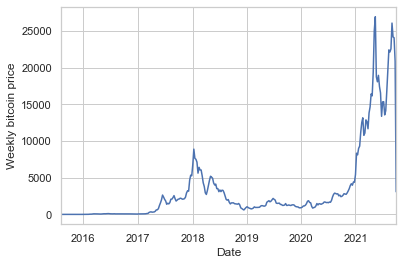

In [184]:
weekly = eth_df.resample('W').sum()
weekly.plot()
plt.ylabel('Weekly bitcoin price')

In [185]:
eth_ts = eth_df

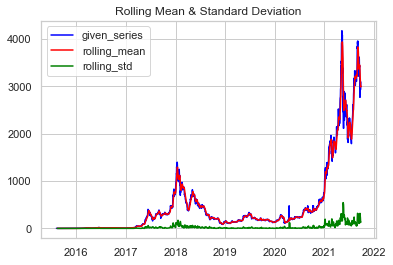

Results of Dickey-Fuller Test:
Test Statistic                    1.021363
p-value                           0.994486
#Lags Used                       19.000000
Number of Observations Used    2224.000000
Critical Value (1%)              -3.433294
Critical Value (5%)              -2.862840
Critical Value (10%)             -2.567462
dtype: float64


In [186]:
from statsmodels.tsa.stattools import adfuller
def test_for_stationary(input_data):
    r_mean = input_data.rolling(window = 7,center=False).mean()
    r_std = input_data.rolling(window = 7,center=False).std()
    
    # plotting the data
    given = plt.plot(input_data, color = 'blue', label = 'given_series')
    rolling_mean = plt.plot(r_mean, color = 'red', label = 'rolling_mean')
    rolling_std = plt.plot(r_std, color ='green', label = 'rolling_std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
     #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(input_data)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
      
test_for_stationary(eth_ts)    

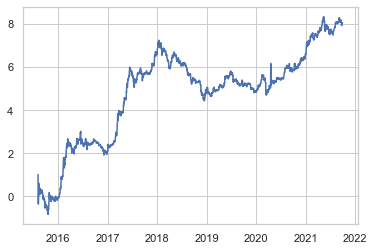

In [188]:
eth_ts_logtransform = np.log(eth_ts)
plt.plot(eth_ts_logtransform)

In [190]:
eth_ts_logtransform.head(10)


Date
2015-08-07    1.019612
2015-08-08   -0.283259
2015-08-09   -0.353969
2015-08-10   -0.344679
2015-08-11    0.065657
2015-08-12    0.196750
2015-08-13    0.603042
2015-08-14    0.603151
2015-08-15    0.524077
2015-08-16    0.448544
Name: Close, dtype: float64

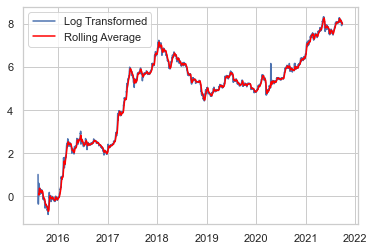

In [191]:
Rolling_average = eth_ts_logtransform.rolling(window = 7, center= False).mean()
plt.plot(eth_ts_logtransform, label = 'Log Transformed')
plt.plot(Rolling_average, color = 'red', label = 'Rolling Average')
plt.legend(loc = 'best')

In [192]:
Rolling_average.head(10)

Date
2015-08-07         NaN
2015-08-08         NaN
2015-08-09         NaN
2015-08-10         NaN
2015-08-11         NaN
2015-08-12         NaN
2015-08-13    0.129022
2015-08-14    0.069528
2015-08-15    0.184861
2015-08-16    0.299506
Name: Close, dtype: float64

In [193]:
log_Rolling_difference = eth_ts_logtransform - Rolling_average
log_Rolling_difference.head(10)
log_Rolling_difference.tail(10)

Date
2021-09-18   -0.004449
2021-09-19   -0.031371
2021-09-20   -0.134375
2021-09-21   -0.171606
2021-09-22   -0.041213
2021-09-23    0.001386
2021-09-24   -0.051086
2021-09-25   -0.030361
2021-09-26    0.027256
2021-09-27    0.029698
Name: Close, dtype: float64

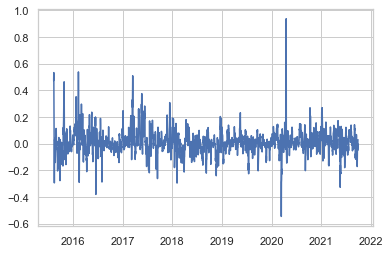

In [194]:
log_Rolling_difference.dropna(inplace=True)
plt.plot(log_Rolling_difference)

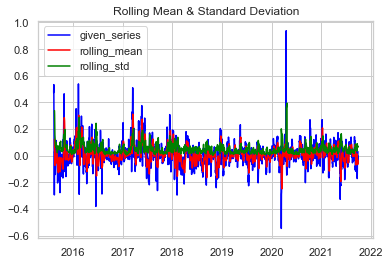

Results of Dickey-Fuller Test:
Test Statistic                -1.353217e+01
p-value                        2.608943e-25
#Lags Used                     6.000000e+00
Number of Observations Used    2.231000e+03
Critical Value (1%)           -3.433284e+00
Critical Value (5%)           -2.862836e+00
Critical Value (10%)          -2.567460e+00
dtype: float64


In [195]:
test_for_stationary(log_Rolling_difference)

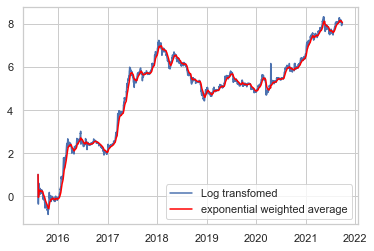

In [196]:
expwighted_avg = eth_ts_logtransform.ewm(halflife=7,min_periods=0,adjust=True,ignore_na=False).mean()
plt.plot(eth_ts_logtransform, label = 'Log transfomed')
plt.plot(expwighted_avg, color='red', label = 'exponential weighted average')
plt.legend(loc = 'best')

In [197]:
expwighted_avg.head(10)

Date
2015-08-07    1.019612
2015-08-08    0.335950
2015-08-09    0.082867
2015-08-10   -0.040378
2015-08-11   -0.014778
2015-08-12    0.029740
2015-08-13    0.137837
2015-08-14    0.218015
2015-08-15    0.266935
2015-08-16    0.294176
Name: Close, dtype: float64

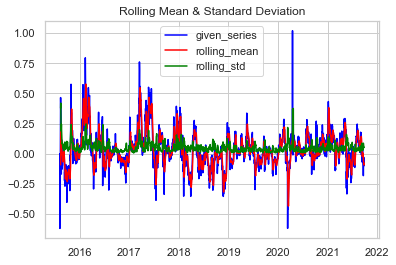

Results of Dickey-Fuller Test:
Test Statistic                -9.770906e+00
p-value                        7.140697e-17
#Lags Used                     1.000000e+00
Number of Observations Used    2.242000e+03
Critical Value (1%)           -3.433270e+00
Critical Value (5%)           -2.862830e+00
Critical Value (10%)          -2.567457e+00
dtype: float64


In [198]:
log_expmovwt_diff = eth_ts_logtransform - expwighted_avg

test_for_stationary(log_expmovwt_diff)

<AxesSubplot:xlabel='Date'>

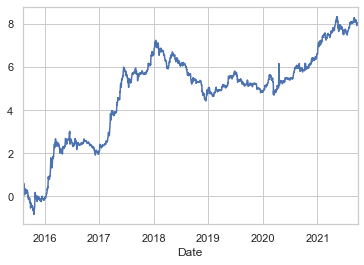

In [199]:
eth_ts_logtransform.plot()


Date
2015-08-07         NaN
2015-08-08         NaN
2015-08-09         NaN
2015-08-10         NaN
2015-08-11         NaN
2015-08-12         NaN
2015-08-13         NaN
2015-08-14   -0.416461
2015-08-15    0.807336
2015-08-16    0.802512
Name: Close, dtype: float64

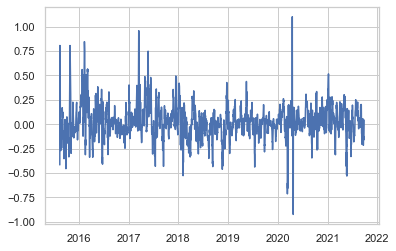

In [200]:
ts_diff_logtrans = eth_ts_logtransform -eth_ts_logtransform.shift(7)
plt.plot(ts_diff_logtrans)
ts_diff_logtrans.head(10)

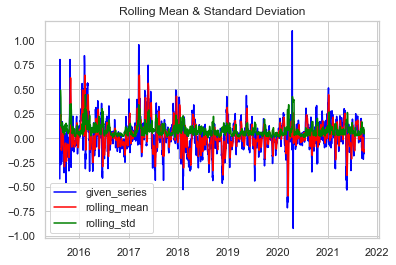

Results of Dickey-Fuller Test:
Test Statistic                -8.267873e+00
p-value                        4.882571e-13
#Lags Used                     2.700000e+01
Number of Observations Used    2.209000e+03
Critical Value (1%)           -3.433314e+00
Critical Value (5%)           -2.862849e+00
Critical Value (10%)          -2.567467e+00
dtype: float64


In [201]:
ts_diff_logtrans.dropna(inplace=True)
test_for_stationary(ts_diff_logtrans)

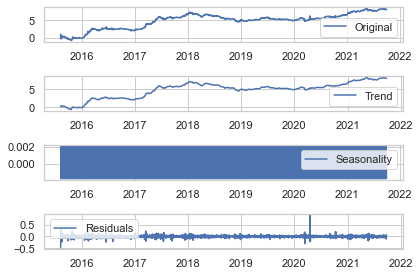

In [203]:
from statsmodels.tsa.seasonal import seasonal_decompose


decomposition = seasonal_decompose(eth_ts_logtransform)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(eth_ts_logtransform, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

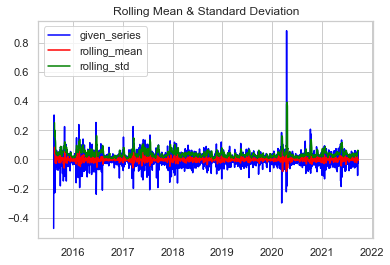

Results of Dickey-Fuller Test:
Test Statistic                -1.616544e+01
p-value                        4.420805e-29
#Lags Used                     2.200000e+01
Number of Observations Used    2.215000e+03
Critical Value (1%)           -3.433306e+00
Critical Value (5%)           -2.862846e+00
Critical Value (10%)          -2.567465e+00
dtype: float64


In [204]:
decomposed_TS = residual
decomposed_TS.dropna(inplace=True)
test_for_stationary(decomposed_TS)

In [205]:
from statsmodels.tsa.stattools import acf, pacf

#ACF and PACF plots:
lag_acf = acf(ts_diff_logtrans, nlags=30)
lag_pacf = pacf(ts_diff_logtrans, nlags=50, method='ols')

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Text(0.5, 1.0, 'Autocorrelation Function')

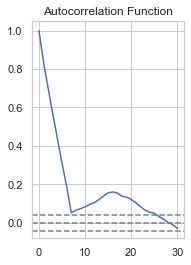

In [206]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff_logtrans)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff_logtrans)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

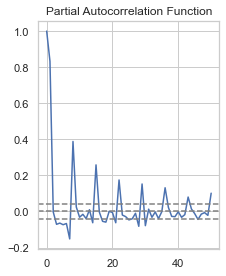

In [207]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff_logtrans)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff_logtrans)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

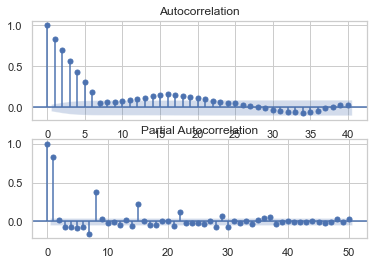

In [208]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure()
pyplot.subplot(211)
plot_acf(ts_diff_logtrans, ax=pyplot.gca(),lags=40)
pyplot.subplot(212)
plot_pacf(ts_diff_logtrans, ax=pyplot.gca(), lags=50)
pyplot.show()

In [209]:
from statsmodels.tsa.arima_model import ARIMA

ts_diff_logtrans = ts_diff_logtrans.fillna(0)

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so infe

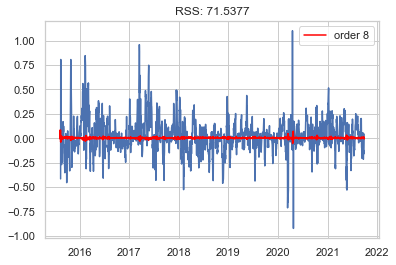

In [210]:
model = ARIMA(eth_ts_logtransform, order=(8, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_diff_logtrans)
plt.plot(results_AR.fittedvalues, color='red', label = 'order 8')
RSS = results_AR.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc = 'best')

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


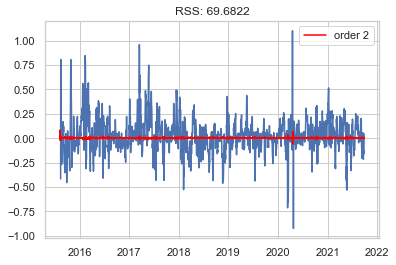

In [211]:
model = ARIMA(eth_ts_logtransform, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_diff_logtrans)
plt.plot(results_AR.fittedvalues, color='red', label = 'order 2')
RSS = results_AR.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc ='best')

In [212]:
print(results_AR.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2243
Model:                 ARIMA(2, 1, 0)   Log Likelihood                2652.510
Method:                       css-mle   S.D. of innovations              0.074
Date:                Thu, 30 Dec 2021   AIC                          -5297.020
Time:                        03:13:22   BIC                          -5274.158
Sample:                    08-08-2015   HQIC                         -5288.674
                         - 09-27-2021                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0032      0.001      2.121      0.034       0.000       0.006
ar.L1.D.Close    -0.0613      0.023     -2.696      0.007      -0.106      -0.017
ar.L2.D.Close     0.0093      0.023     

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so infe

Text(0.5, 1.0, 'RSS: 71.8879')

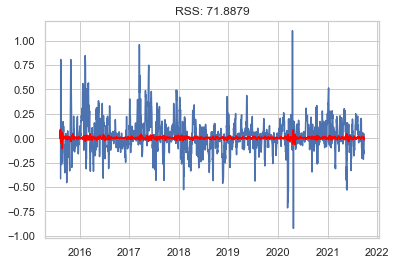

In [213]:
model = ARIMA(eth_ts_logtransform, order=(0, 1,18)) 
results_MA = model.fit(disp=-1)  
plt.plot(ts_diff_logtrans)
plt.plot(results_MA.fittedvalues, color='red')
RSS = results_MA.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))

In [214]:
print(results_MA.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2243
Model:                ARIMA(0, 1, 18)   Log Likelihood                2670.343
Method:                       css-mle   S.D. of innovations              0.074
Date:                Thu, 30 Dec 2021   AIC                          -5300.686
Time:                        03:15:21   BIC                          -5186.375
Sample:                    08-08-2015   HQIC                         -5258.957
                         - 09-27-2021                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0031      0.002      1.859      0.063      -0.000       0.006
ma.L1.D.Close     -0.0634      0.023     -2.794      0.005      -0.108      -0.019
ma.L2.D.Close      0.0031      0.023

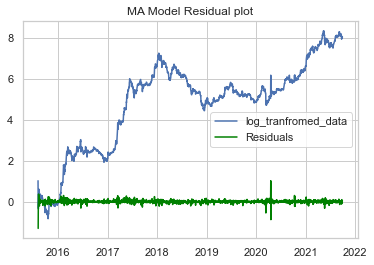

In [216]:
plt.plot(eth_ts_logtransform, label = 'log_tranfromed_data')
plt.plot(results_MA.resid, color ='green',label= 'Residuals')
plt.title('MA Model Residual plot')
plt.legend(loc = 'best')

count    2243.000000
mean       -0.000011
std         0.073725
min        -1.305989
25%        -0.027482
50%        -0.002534
75%         0.027300
max         1.018304
dtype: float64


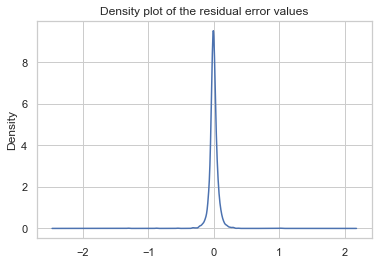

In [217]:
results_MA.resid.plot(kind='kde')
plt.title('Density plot of the residual error values')
print(results_MA.resid.describe())

In [219]:
model = ARIMA(eth_ts_logtransform, order=(8, 1, 18))  
results_ARIMA = model.fit(trend= 'nc', disp=-1)  
plt.plot(ts_diff_logtrans)
plt.plot(results_ARIMA.fittedvalues, color='red', label = 'p =8, q =18')
RSS =results_ARIMA.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc='best')

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so infe

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

In [220]:
print(results_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2519
Model:                ARIMA(8, 1, 18)   Log Likelihood                4595.153
Method:                       css-mle   S.D. of innovations              0.039
Date:                Thu, 30 Dec 2021   AIC                          -9136.305
Time:                        03:18:04   BIC                          -8978.852
Sample:                    09-18-2014   HQIC                         -9079.164
                         - 08-10-2021                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
ar.L1.D.Close      0.5522      0.033     16.772      0.000       0.488       0.617
ar.L2.D.Close      0.6028      0.034     17.520      0.000       0.535       0.670
ar.L3.D.Close     -0.6392      0.030

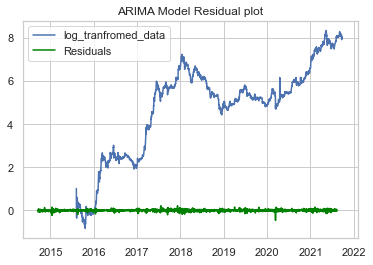

In [221]:
plt.plot(eth_ts_logtransform, label = 'log_tranfromed_data')
plt.plot(results_ARIMA.resid, color ='green',label= 'Residuals')
plt.title('ARIMA Model Residual plot')
plt.legend(loc = 'best')

count    2519.000000
mean        0.001681
std         0.039011
min        -0.460698
25%        -0.013935
50%         0.001626
75%         0.018326
max         0.218687
dtype: float64


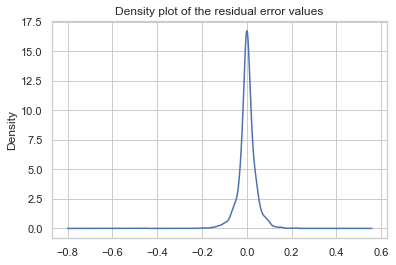

In [222]:
results_ARIMA.resid.plot(kind='kde')
plt.title('Density plot of the residual error values')
print(results_ARIMA.resid.describe())

In [223]:
test = pd.read_csv("ETH-USD.csv",index_col= 'Date')
test.index = pd.to_datetime(test.index)
test = test['Close']
test = test.sort_index()
test = test.iloc[1000:1007]
test

Date
2018-05-03    779.543030
2018-05-04    785.624023
2018-05-05    816.119995
2018-05-06    792.310974
2018-05-07    753.724976
2018-05-08    752.856995
2018-05-09    752.275024
Name: Close, dtype: float64

In [225]:
test_logtransform = np.log(test)

In [226]:
history = [x for x in eth_ts_logtransform]
predictions = list()
for t in range(len(test)):
    output = results_MA.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_logtransformed[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_logtransformed, predictions)
print('Test MSE: %.3f' % error)

predicted=8.035988, expected=6.658708
predicted=8.035988, expected=6.666478
predicted=8.035988, expected=6.704561
predicted=8.035988, expected=6.674954
predicted=8.035988, expected=6.625028
predicted=8.035988, expected=6.623875
predicted=8.035988, expected=6.623102
Test MSE: 1.911


In [ ]:
# Calculate the absolute errors
errors = abs(yhat - obs)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / obs)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

In [227]:
from matplotlib import pyplot as plt
from matplotlib.dates import MonthLocator, num2date
from matplotlib.ticker import FuncFormatter

In [228]:
from fbprophet import Prophet

In [230]:
eth_df.head()

Date
2015-08-07    2.772120
2015-08-08    0.753325
2015-08-09    0.701897
2015-08-10    0.708448
2015-08-11    1.067860
Name: Close, dtype: float64

In [231]:
data_prophet = eth_df.copy()
data_prophet = pd.DataFrame(data_prophet)
data_prophet.reset_index(drop=False, inplace=True)
data_prophet.columns =['ds','y']
data_prophet

,ds,y
0,2015-08-07,2.772120
1,2015-08-08,0.753325
2,2015-08-09,0.701897
3,2015-08-10,0.708448
4,2015-08-11,1.067860
...,...,...
2239,2021-09-23,3155.523682
2240,2021-09-24,2931.669189
2241,2021-09-25,2925.565674
2242,2021-09-26,3062.265381


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<AxesSubplot:xlabel='Date'>

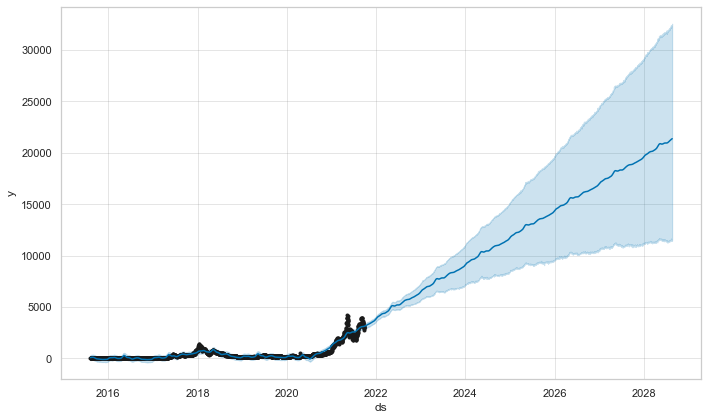

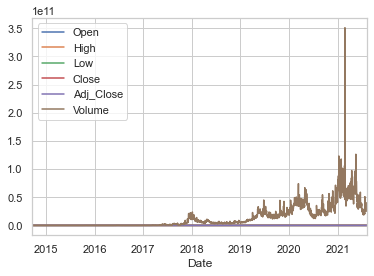

In [232]:
m = Prophet()
m.fit(data_prophet)
future = m.make_future_dataframe (periods=2520)#, freq='D')
forecast = m.predict(future)
m.plot(forecast)
data.plot()

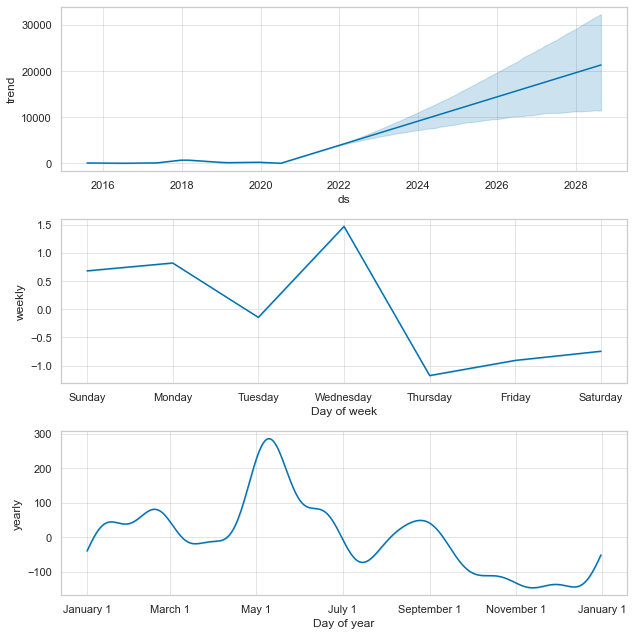

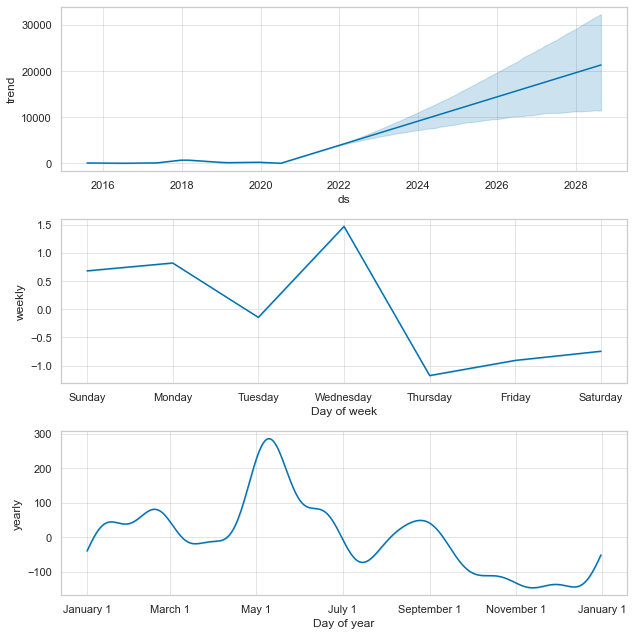

In [233]:
m.plot_components(forecast)

In [234]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [235]:
forecasted_values = forecast[['ds', 'yhat']].tail(7)

In [236]:
forecasted_values = forecasted_values.set_index('ds')
forecasted_values.columns = ['y']
forecasted_values

,y
ds,
2028-08-15,21313.960103
2028-08-16,21324.983059
2028-08-17,21331.565760
2028-08-18,21340.885725
2028-08-19,21349.902142
2028-08-20,21359.974219
2028-08-21,21368.528050


In [237]:
forecasted_values.count

<bound method DataFrame.count of                        y
ds                      
2028-08-15  21313.960103
2028-08-16  21324.983059
2028-08-17  21331.565760
2028-08-18  21340.885725
2028-08-19  21349.902142
2028-08-20  21359.974219
2028-08-21  21368.528050>

In [238]:
mean_squared_error(forecasted_values['y'],test)

422934382.34179264

# Randon Forest

In [223]:
rf_df = data_e.copy()

In [224]:
rf_df.head

<bound method NDFrame.head of                    Open         High          Low        Close    Adj_Close  \
Date                                                                          
2015-08-07     2.831620     3.536610     2.521120     2.772120     2.772120   
2015-08-08     2.793760     2.798810     0.714725     0.753325     0.753325   
2015-08-09     0.706136     0.879810     0.629191     0.701897     0.701897   
2015-08-10     0.713989     0.729854     0.636546     0.708448     0.708448   
2015-08-11     0.708087     1.131410     0.663235     1.067860     1.067860   
...                 ...          ...          ...          ...          ...   
2021-09-23  3077.974365  3173.544678  3038.097900  3155.523682  3155.523682   
2021-09-24  3154.562012  3159.644043  2747.337646  2931.669189  2931.669189   
2021-09-25  2930.884766  2968.994629  2818.970459  2925.565674  2925.565674   
2021-09-26  2926.343018  3114.857422  2744.583008  3062.265381  3062.265381   
2021-09-27  3059.98535

In [225]:
rf_df = rf_df.ffill()

In [226]:
#removing the null values in the data set and filling them with mean

rf_df.fillna(rf_df.mean())
for i in rf_df.columns[rf_df.isnull().any(axis=0)]:     
    rf_df[i].fillna(rf_df[i].mean(),inplace=True)

In [227]:
rf_df.isnull().any()#We don't have any NaN values luckily

Open         False
High         False
Low          False
Close        False
Adj_Close    False
Volume       False
dtype: bool

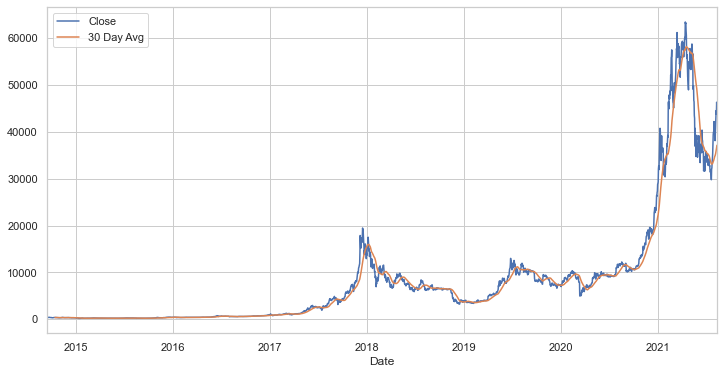

In [228]:
sns.set()
sns.set_style('whitegrid')
data['Close'].plot(figsize=(12,6),label='Close')
data['Close'].rolling(window=30).mean().plot(label='30 Day Avg')# Plotting the 
#rolling 30 day average against the Close Price
plt.legend()

In [229]:
rf_df['ohlc_average'] = (rf_df['Open'] + rf_df['High'] + rf_df['Low'] + rf_df['Close']) / 4


In [230]:
rf_df.head()

,Open,High,Low,Close,Adj_Close,Volume,ohlc_average
Date,,,,,,,
2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,164329.0,2.915368
2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,674188.0,1.765155
2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,532170.0,0.729259
2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,405283.0,0.697209
2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1463100.0,0.892648


In [231]:
rf_df['Price_After_Month']=rf_df['Close'].shift(-30) #This will be our label

In [232]:
#Preprocessing
from sklearn import preprocessing
rf_df.dropna(inplace=True)
X=rf_df.drop('Price_After_Month',axis=1)
X=preprocessing.scale(X)#We need to scale our values to input them in our model
y=rf_df['Price_After_Month']

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [233]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [234]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=200,random_state=101)
reg.fit(X_train,y_train)
accuracy=reg.score(X_test,y_test)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('Accuracy is:',accuracy,'%')

Accuracy is: 94.1159 %


In [235]:
preds = reg.predict(X_test)
print("The prediction is:",preds[30],"But the real value is:" ,y_test[30])

The prediction is: 10.401703699999983 But the real value is: 9.86719


In [236]:
X_30=X[-30:]
forecast=reg.predict(X_30)

In [239]:
from datetime import datetime, timedelta
last_date=data_e.iloc[-1].name
modified_date = last_date + timedelta(days=1)
date=pd.date_range(modified_date,periods=30,freq='D')
df1=pd.DataFrame(forecast,columns=['Forecast'],index=date)
data_e=data_e.append(df1)
data_e.tail()

,Open,High,Low,Close,Adj_Close,Volume,Forecast
2021-10-23,NaN,NaN,NaN,NaN,NaN,NaN,3193.221221
2021-10-24,NaN,NaN,NaN,NaN,NaN,NaN,2963.264614
2021-10-25,NaN,NaN,NaN,NaN,NaN,NaN,2963.065799
2021-10-26,NaN,NaN,NaN,NaN,NaN,NaN,2996.388483
2021-10-27,NaN,NaN,NaN,NaN,NaN,NaN,3009.810317


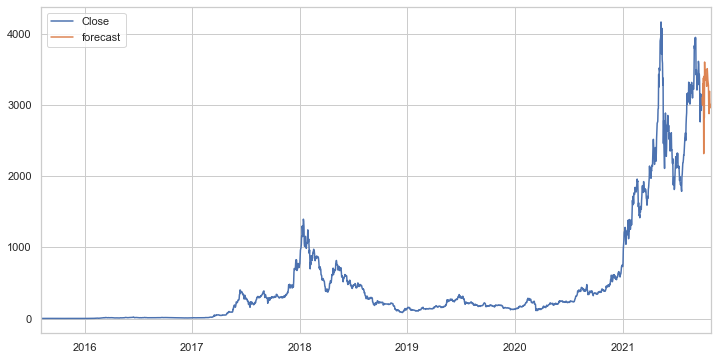

In [241]:
data_e['Close'].plot(figsize=(12,6),label='Close')
data_e['Forecast'].plot(label='forecast')
plt.legend()